In [1]:
#1) Importing libraries, loading dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"/Users/niccolocomar/Documents/Kaggle/Boston Housing Dataset/housing-2.csv")

In [2]:
#2) Exploratory dataset analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [3]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [4]:
df.shape 

(506, 14)

In [5]:
df.duplicated().sum() 

0

In [6]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

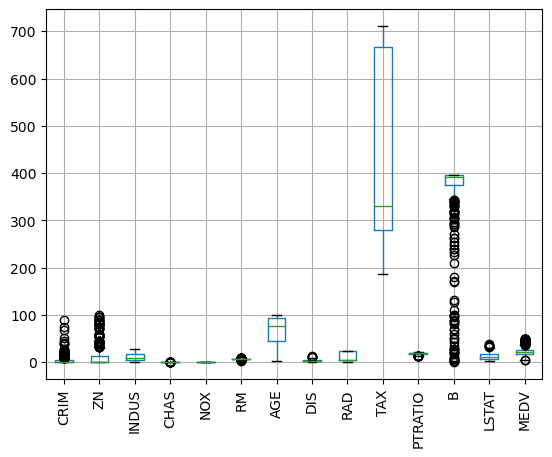

In [7]:
df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [8]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [9]:
df.head(3)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7

/var/folders/t3/9f4_1rvd0zq18r6tpxq933zw0000gn/T/ipykernel_37618/496914684.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins=50, ax=ax)


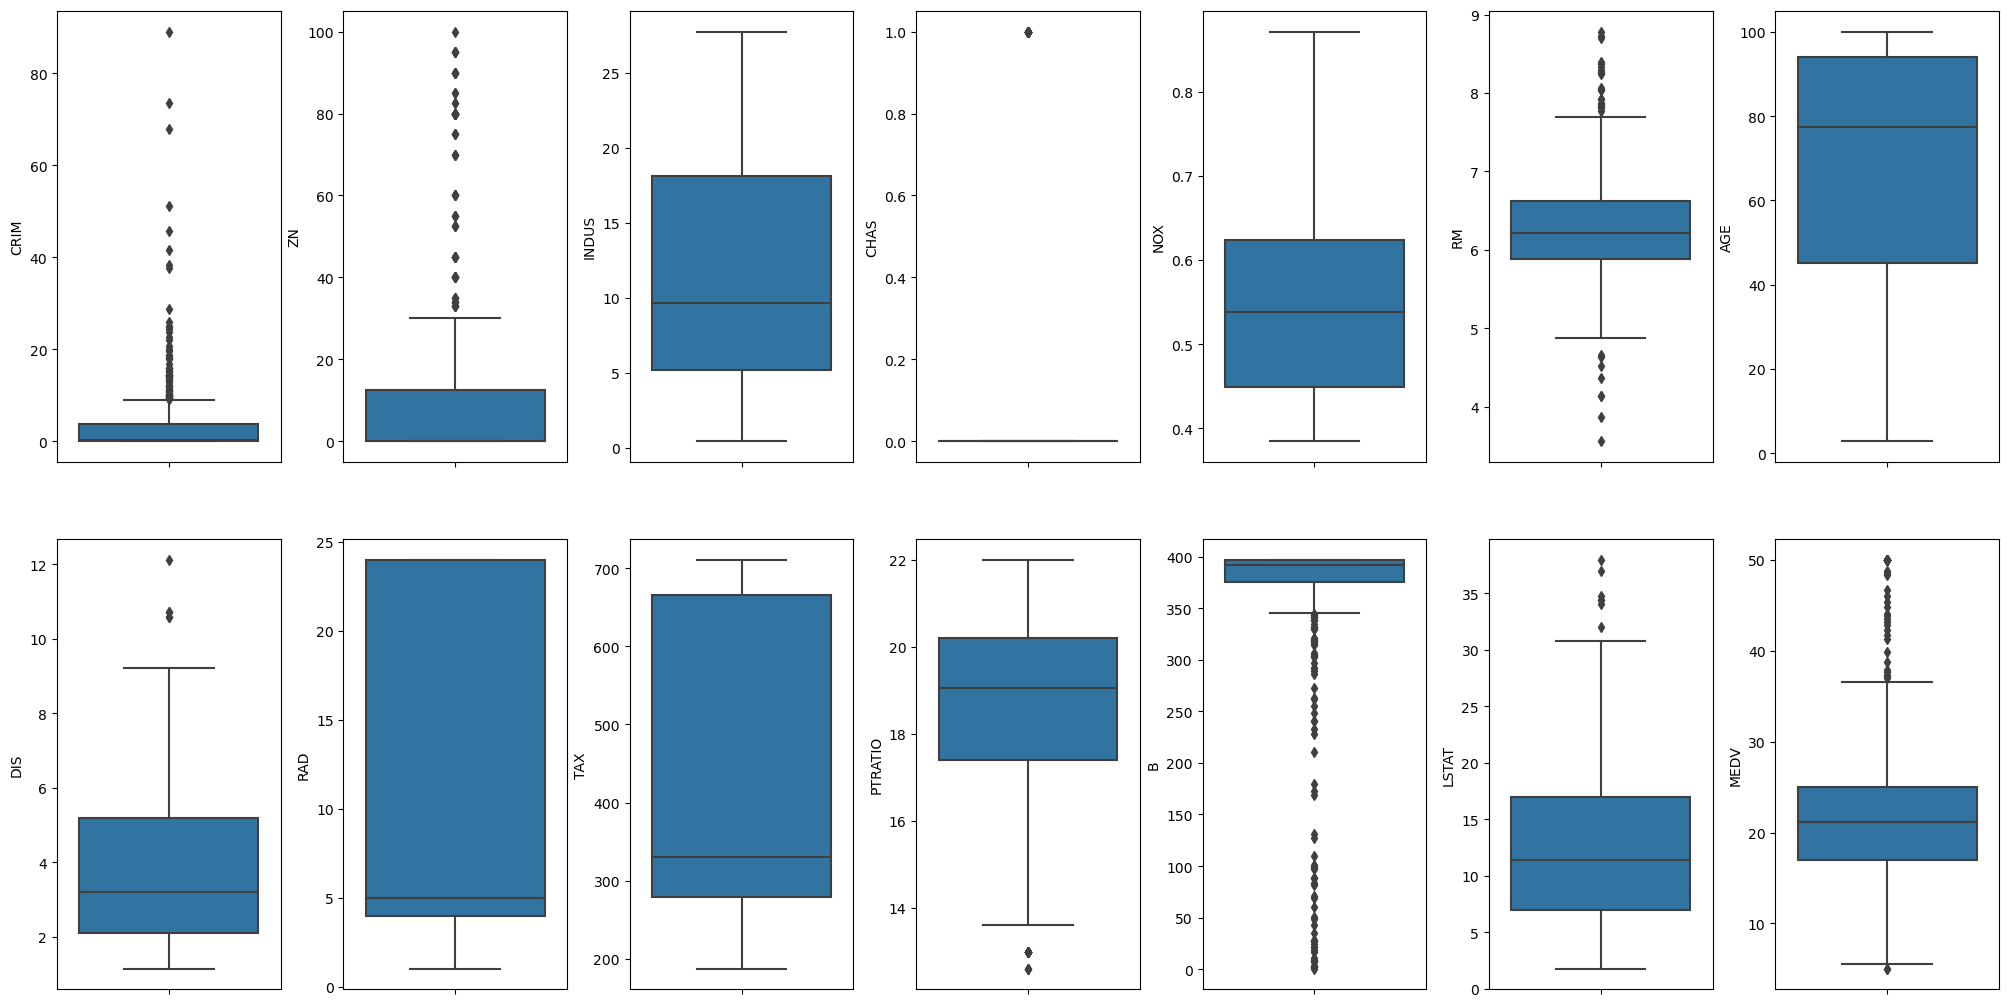

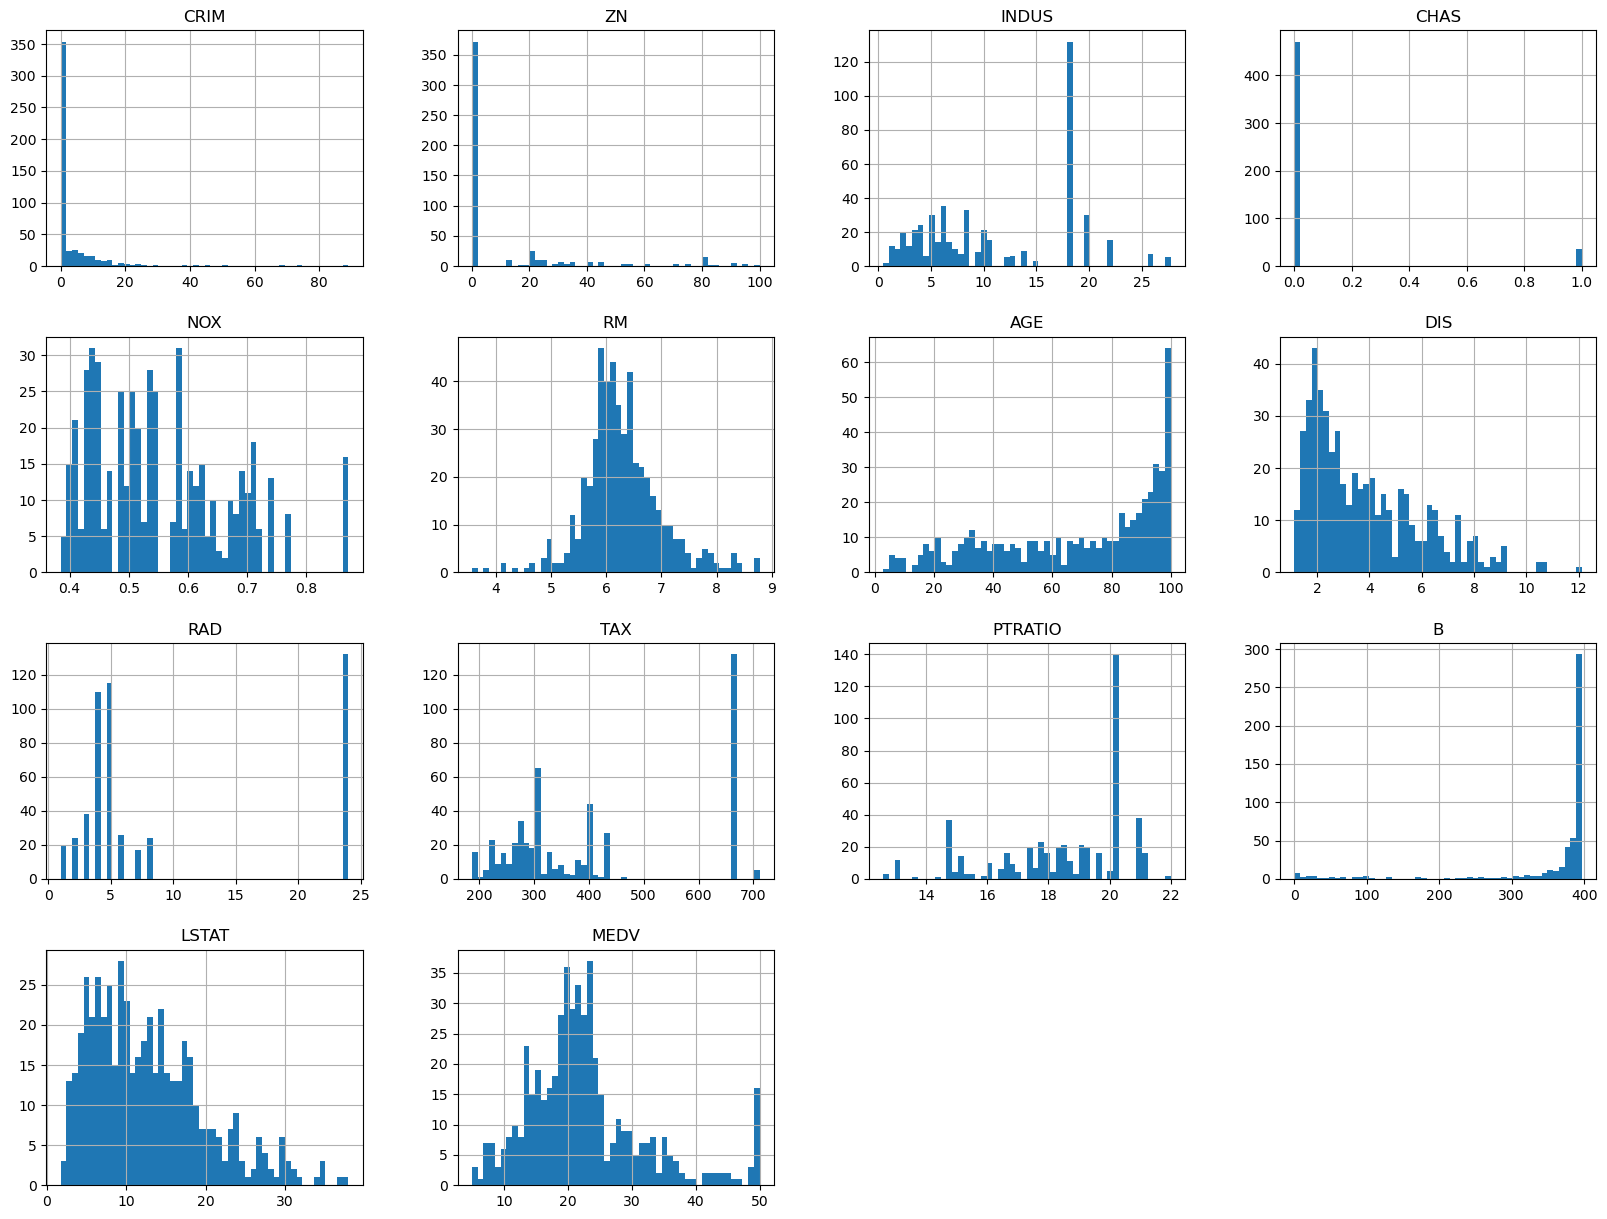

In [10]:
#3) Data analysis

fig, ax = plt.subplots(figsize=(20, 15))
df.hist(bins=50, ax=ax)
plt.show()

In [11]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k, v in df.items():
    sns.histplot(v, ax=axs[index], kde=True, line_kws={'linewidth': 2})
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

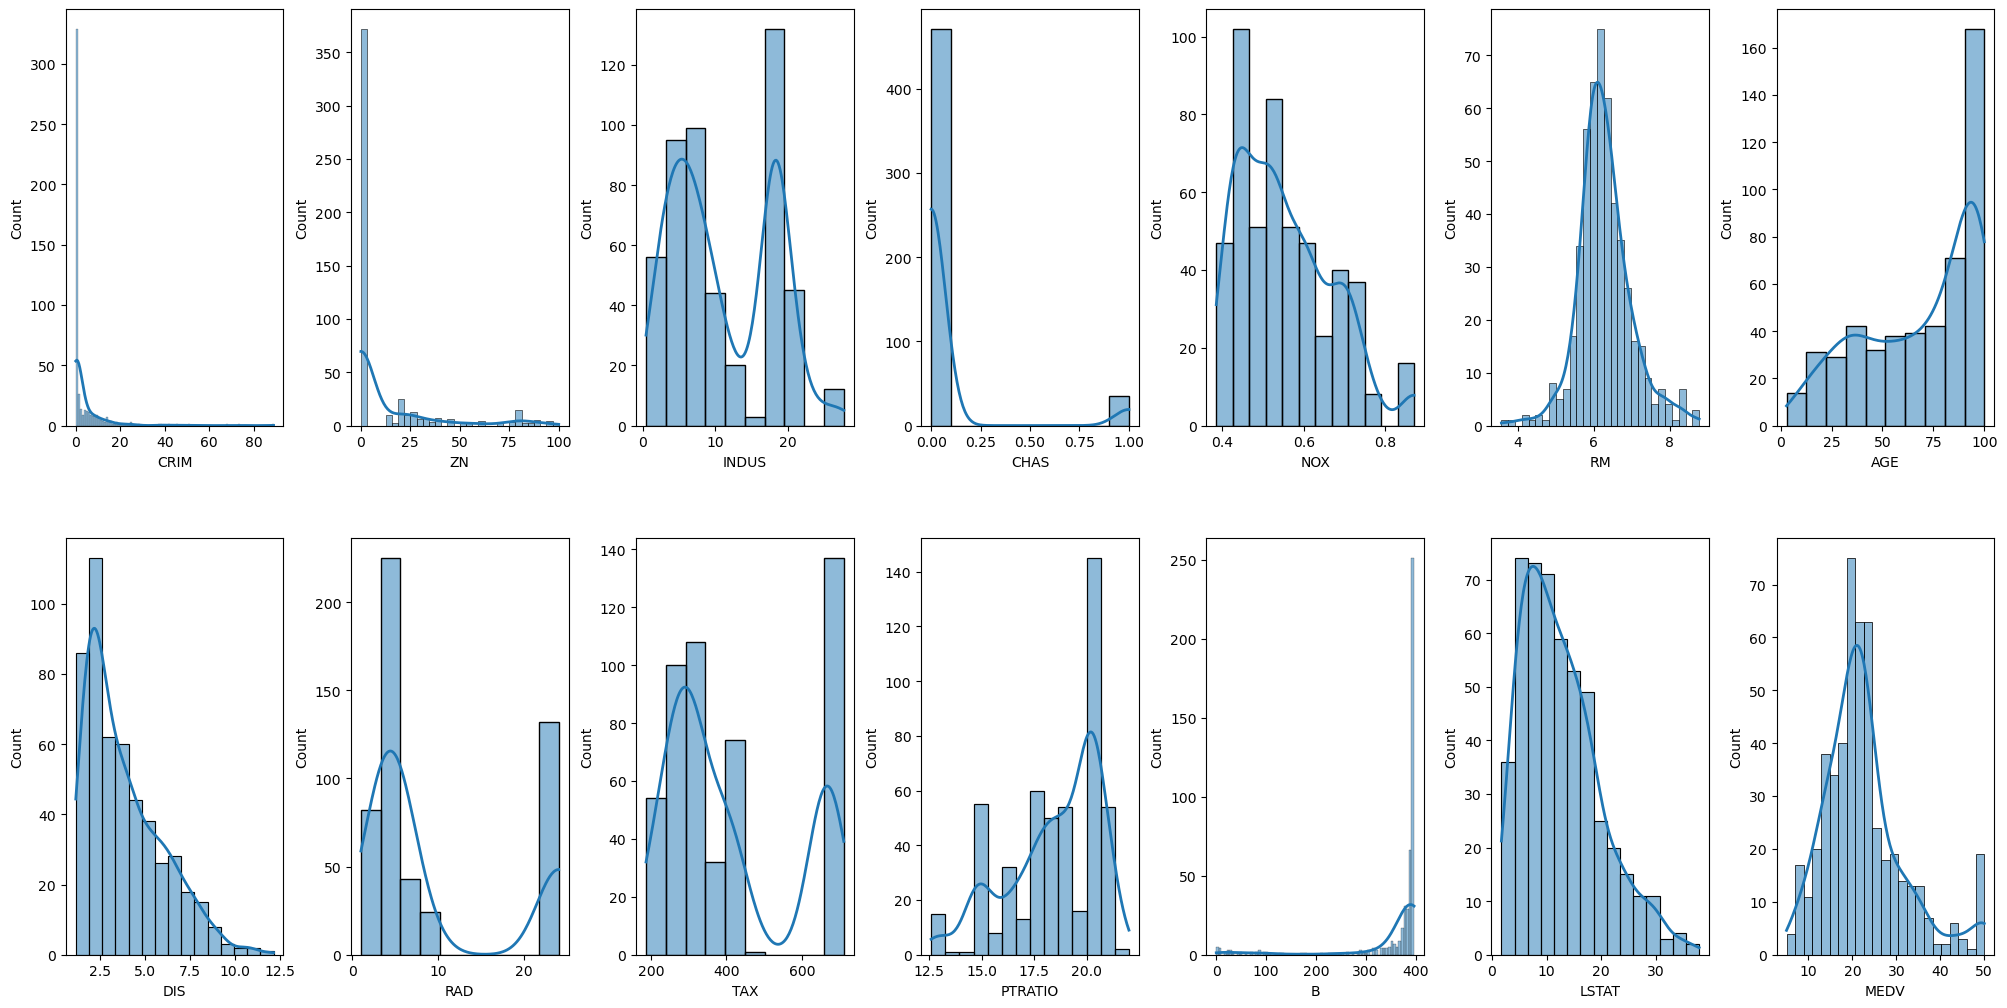

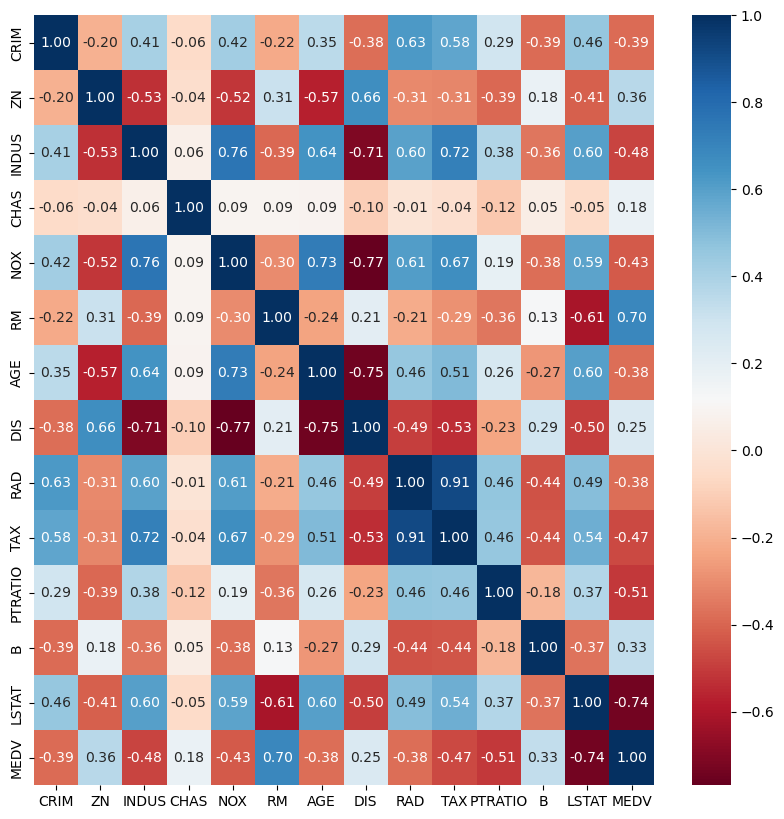

In [12]:
df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='RdBu', annot=True, fmt=".2f")
plt.show()

Let's isolate all of the features ('MEDV' will be our target variable). They are all numerical, so we will plot them all into scatterplots against the target variable

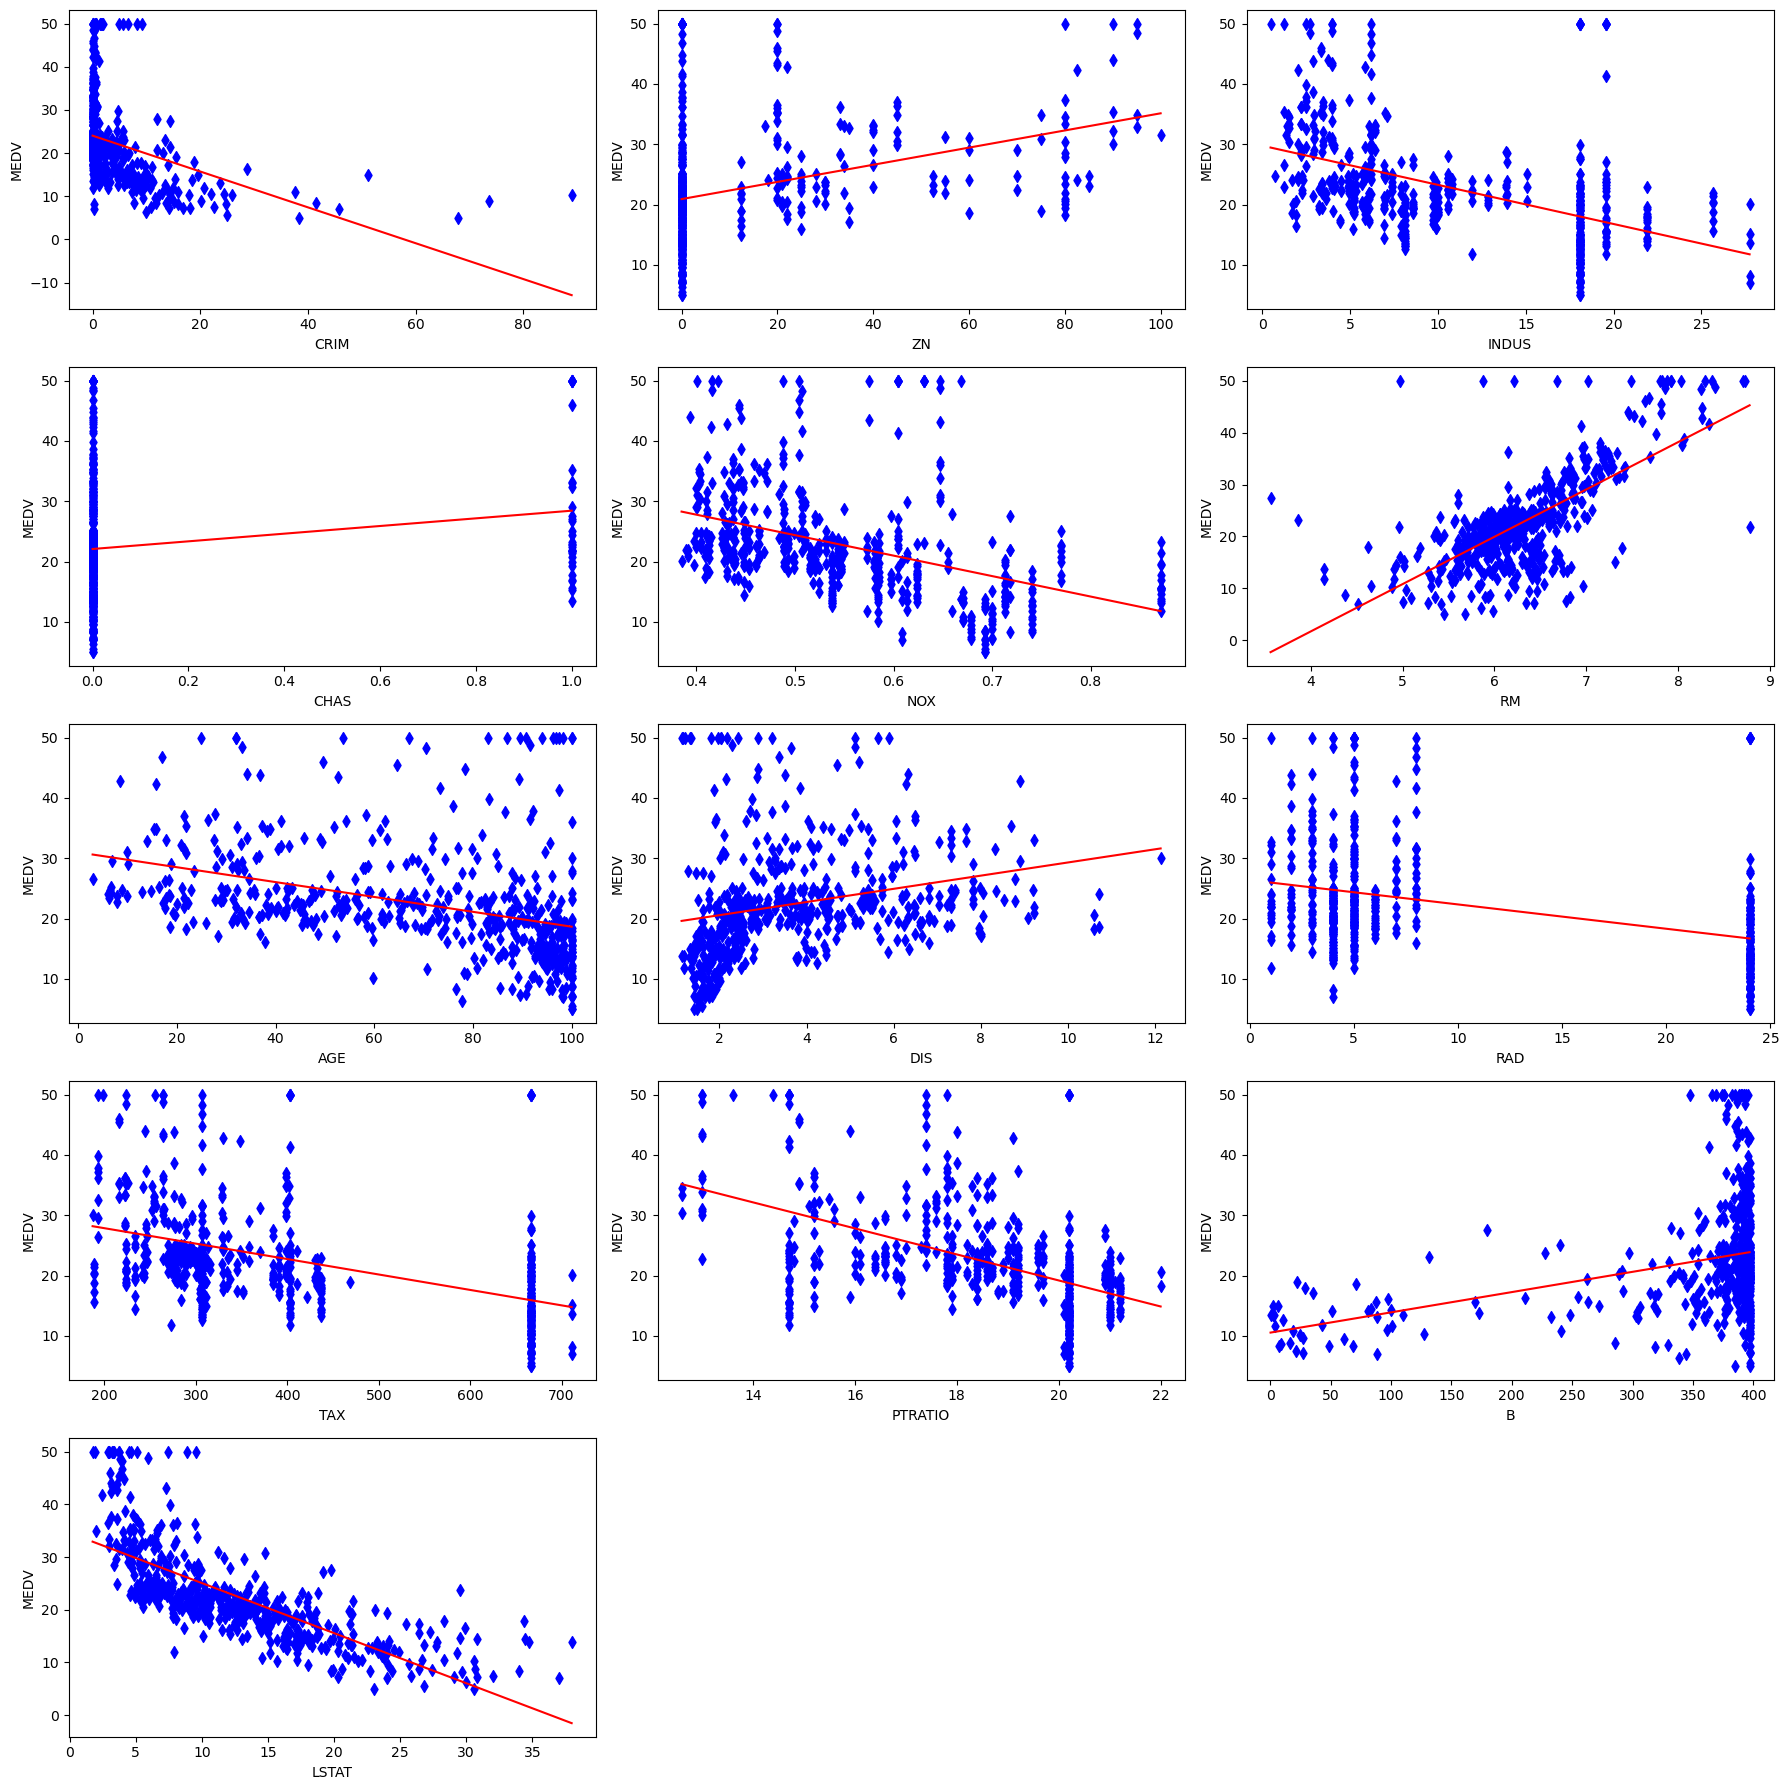

In [13]:
features = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

plt.figure(figsize=(18, 18))

for i, idx in enumerate(df.columns[0:13]):
    plt.subplot(5, 3, i+1)
    x = df[idx]
    y = df['MEDV']
    plt.scatter(x, y, color='blue', marker='d')  # Scatterplot in blue
    
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')
    plt.xlabel(idx)
    plt.ylabel('MEDV')

plt.tight_layout()
plt.show()

We can see also from the scatterplots that 'RM' and 'LSTAT' have high correlation (0.70 and -0.74 respectively) with 'MEDV'. 'PTRATIO'(-0.51), 'INDUS'(-0.48), 'TAX'(-0.47), 'NOX'(-0.43) and 'AGE'(-0.38) have some significant negative correlation 'MEDV', while 'ZN'(0.36), 'DIS' (0.25) and 'B' (0.33) have some positive correlation with the target variable.

In [14]:
print(df.nunique())

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64


As 'CHAS' (Charles River proximity) and 'RAD' (index of accessibility to highways) have only 2 and 9 values only, we can use them to further check if they have any effect on the relationships between the other features and the target variable 'MEDV'.

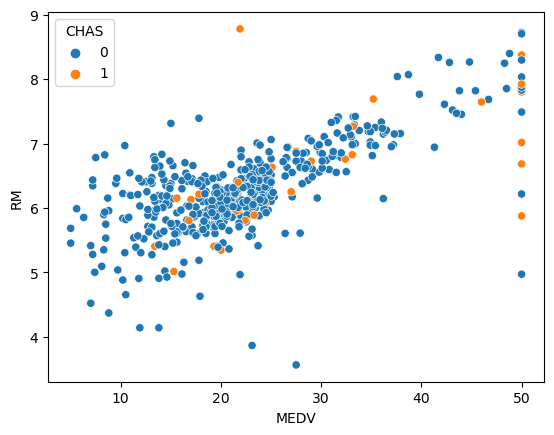

In [15]:
#RM vs MEDV

sns.scatterplot(data=df, x="MEDV", y="RM", hue="CHAS", legend=True)
plt.show()

MEDV (median house value in thousands $) is growing along with RM (average number of rooms per dwelling). In fact, as we checked on the correlation matrix, the two variables are highly correlated (0.70).
The vast majority of the houses are not located by the river.

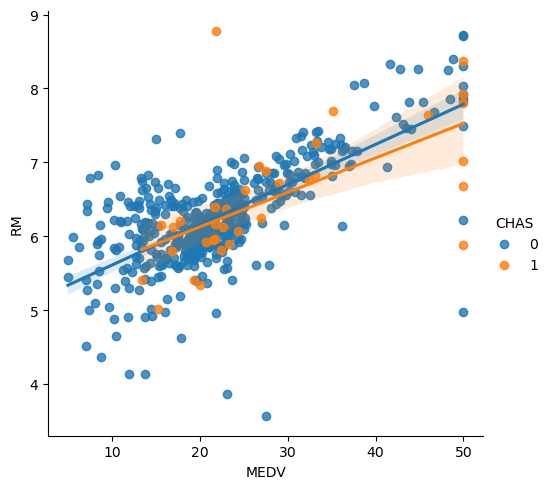

In [16]:
sns.lmplot(x="MEDV", y="RM", hue="CHAS", data=df, legend=True)
plt.show()

Little effect of CHAS (river vicinity) on the strong correlation between RM and MEDV (house price increases if number of rooms in dwelling increases as well).

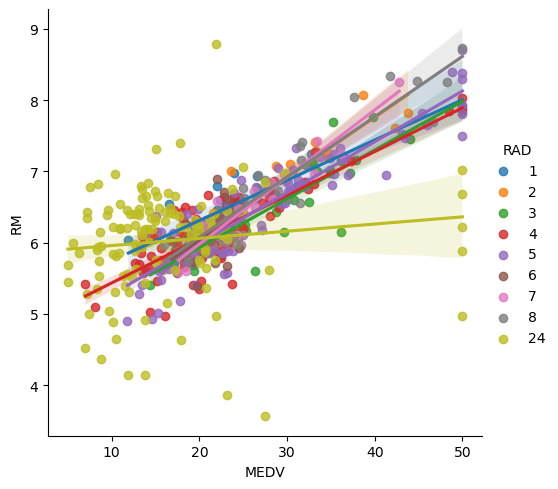

In [17]:
sns.lmplot(x="MEDV", y="RM", hue="RAD", data=df, legend=True)
plt.show()

#RAD (index of accessibility to radial highways) has some interesting features. Most RAD indexes (all but number 24) are reinforcing the positive correlation between RM and MEDV, while on RAD number 24 it feels like house prices increase much slowly in comparison to RM growth.

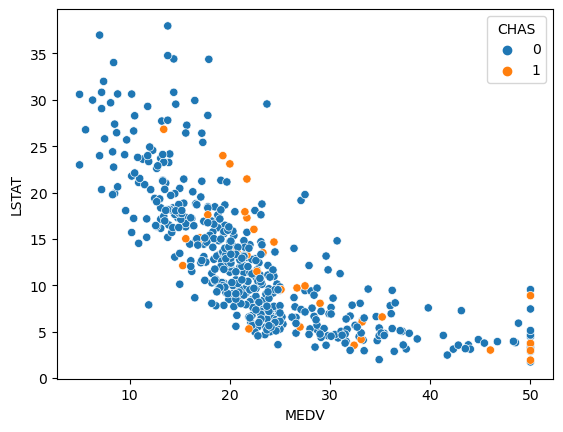

In [18]:
#LSTAT vs MEDV

sns.scatterplot(data=df, x="MEDV", y="LSTAT", hue="CHAS", legend=True)
plt.show()

Lower status % of population (LSTAT) and MEDV are highly negatively correlated (-0.74). This means that the if population belongs to a lower status, it is more connected to a lower MEDV (median house value). Higher values of MEDV are linked to a much smaller proportion of lower status population.
Higher value houses don’t belong much to lower status population.

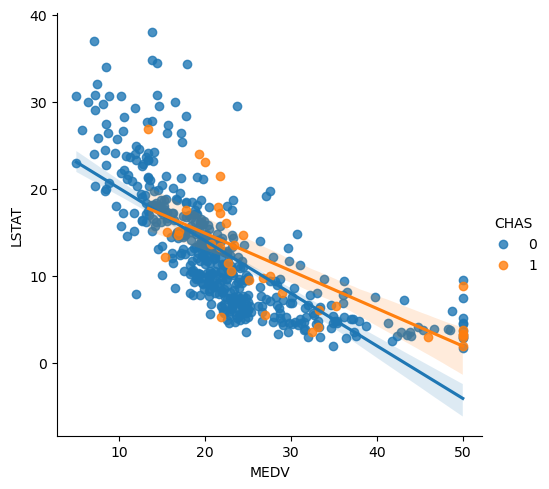

In [19]:
sns.lmplot(x="MEDV", y="LSTAT", hue="CHAS", data=df, legend=True)
plt.show()

River vicinity doesn’t affect much the high negative correlation between LSTAT and MEDV

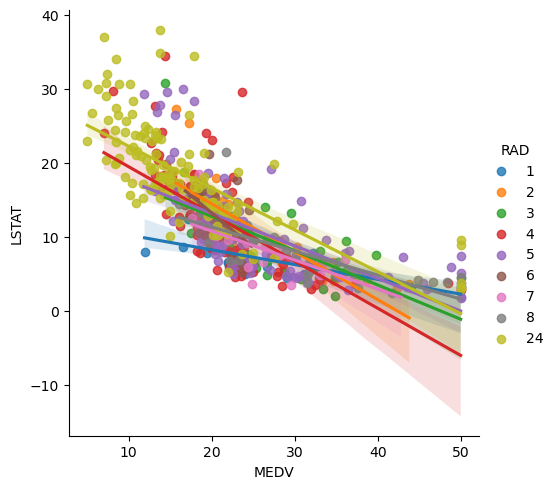

In [20]:
sns.lmplot(x="MEDV", y="LSTAT", hue="RAD", data=df, legend=True)
plt.show()

Generally, MEDV increases while LSTAT increase for all RAD indexes, even though:
- for RAD=5, the negative correlation between the two variables is the stronger, hinting that most lower status population may live there,
- for RAD=1, the negative correlation between the two variables is the less strong.

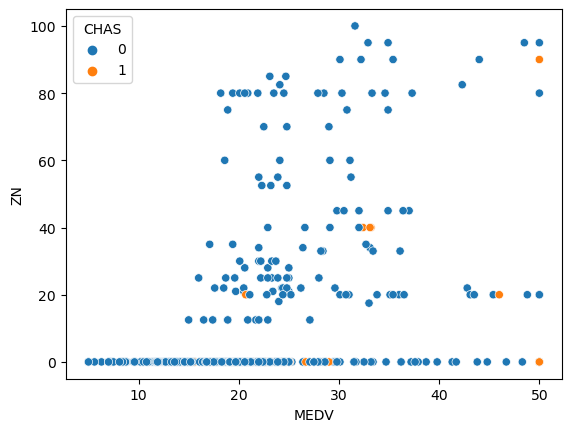

In [21]:
#ZN vs MEDV

sns.scatterplot(data=df, x="MEDV", y="ZN", hue="CHAS", legend=True)
plt.show()

Mild positive regression (0.36) between MEDV and ZN (proportion of residential land zoned for lots over 25,000 sq.ft.). This hints that the larger the residential lots, the more pricey the house value would be.
River proximity isn’t affecting much this relationship.

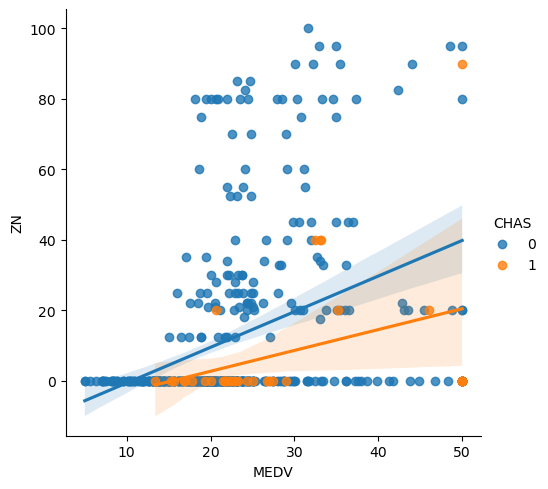

In [22]:
sns.lmplot(x="MEDV", y="ZN", hue="CHAS", data=df, legend=True)
plt.show()

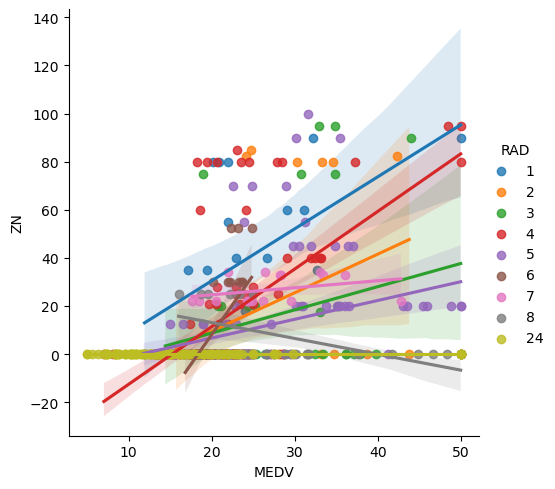

In [23]:
sns.lmplot(x="MEDV", y="ZN", hue="RAD", data=df, legend=True)
plt.show()

By breaking down the MEDV/ZV relationship with the RAD indexes, we can see that the positive correlation is stronger on RAD indexes 1, 4 (and to some extend 6), and weaker on RAD indexes 7,8 and 24 (actually, price increases if ZN decreases for RAD=8).

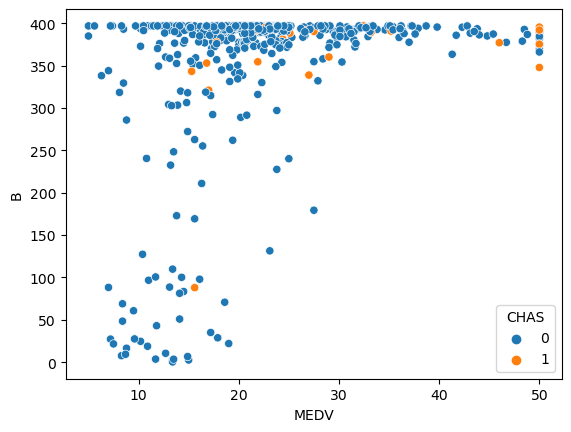

In [24]:
#B vs MEDV

sns.scatterplot(data=df, x="MEDV", y="B", hue="CHAS", legend=True)
plt.show()

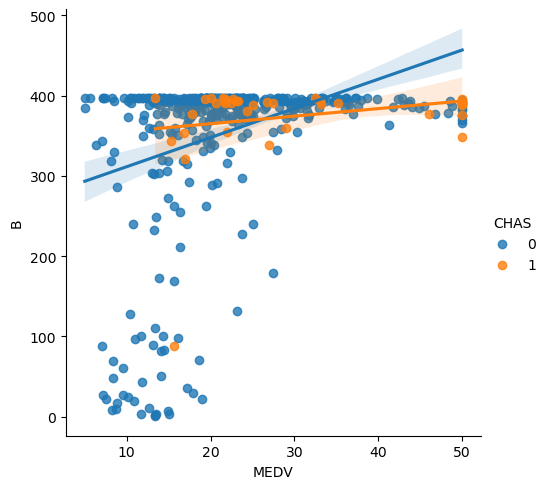

In [25]:
sns.lmplot(x="MEDV", y="B", hue="CHAS", data=df, legend=True)
plt.show()

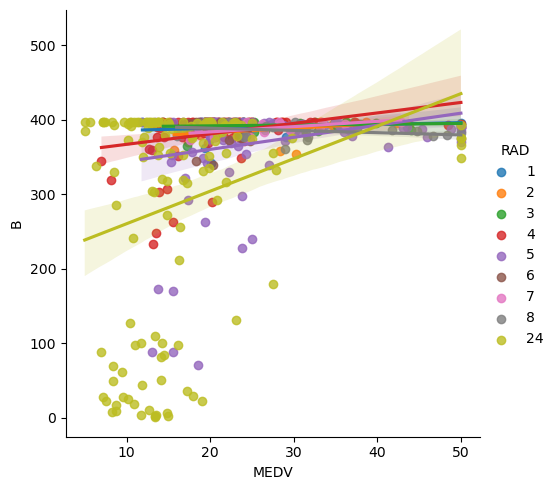

In [26]:
sns.lmplot(x="MEDV", y="B", hue="RAD", data=df, legend=True)
plt.show()

B (proportion of black people by town) and MEDV (house value) have some positive correlation (0.33).
House prices tend to have a little growth if B grows as well.
This relationship is stronger on RAD=24 and RAD=4, and if the house isn’t close to the river.

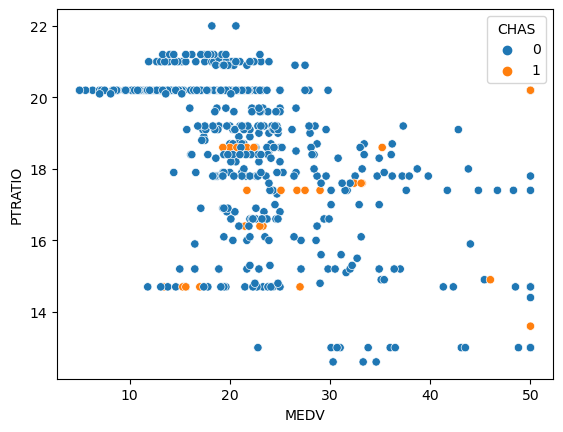

In [27]:
#PTRATIO vs MEDV

sns.scatterplot(data=df, x="MEDV", y="PTRATIO", hue="CHAS", legend=True)
plt.show()

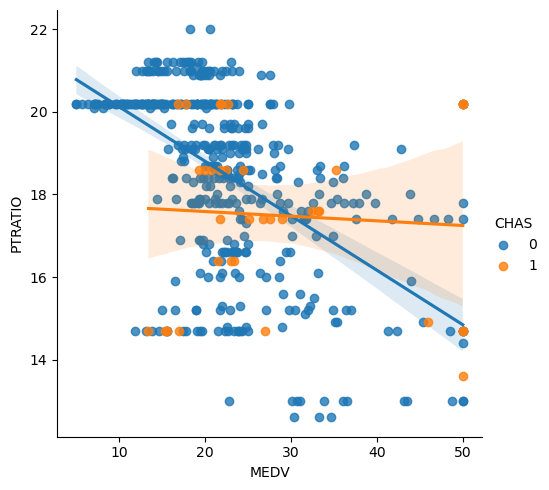

In [28]:
sns.lmplot(x="MEDV", y="PTRATIO", hue="CHAS", data=df, legend=True)
plt.show()

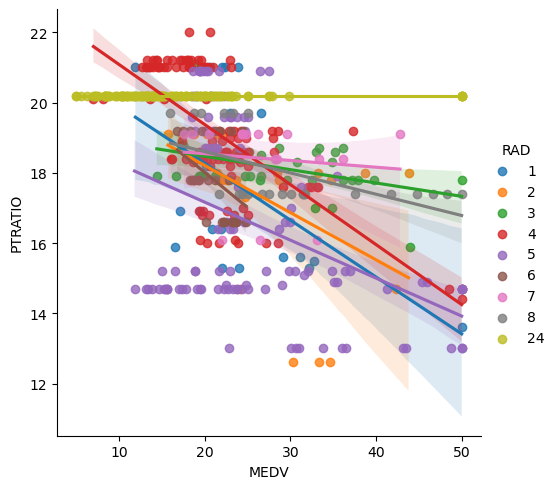

In [29]:
sns.lmplot(x="MEDV", y="PTRATIO", hue="RAD", data=df, legend=True)
plt.show()

PTRATIO (Pupil-Teacher ratio per town) and MEDV are negatively correlated (-0.51), meaning that if house price rises, the pupil-teacher ratio is decreasing.
This relationship is stronger not in river proximity and when RAD=1 or RAD=5.

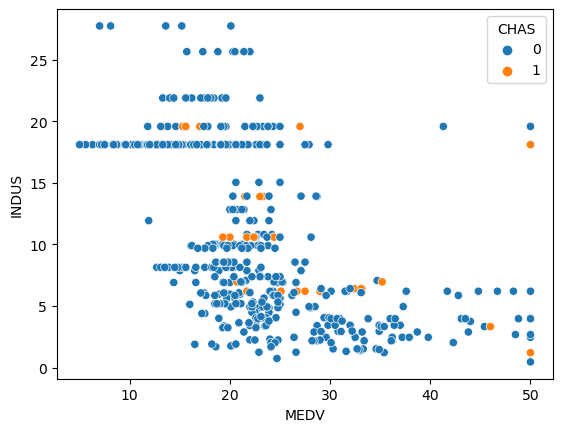

In [30]:
#INDUS vs MEDV

sns.scatterplot(data=df, x="MEDV", y="INDUS", hue="CHAS", legend=True)
plt.show()

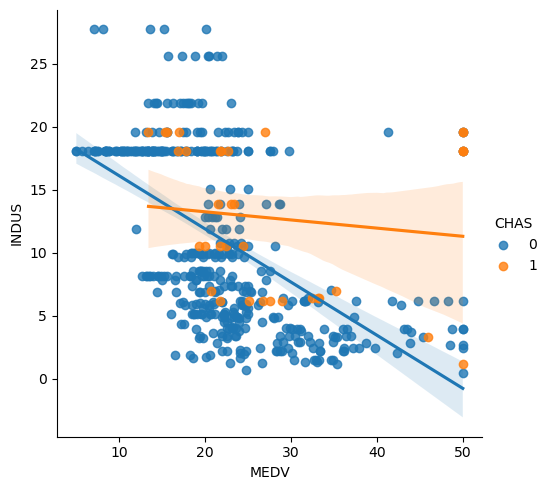

In [31]:
sns.lmplot(x="MEDV", y="INDUS", hue="CHAS", data=df, legend=True)
plt.show()

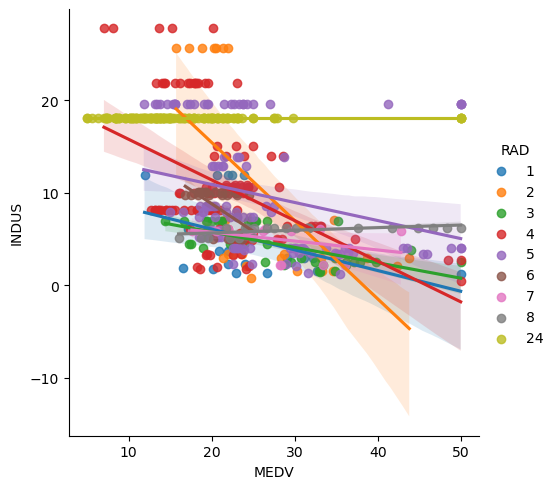

In [32]:
sns.lmplot(x="MEDV", y="INDUS", hue="RAD", data=df, legend=True)
plt.show()

INDUS (proportion of non-industrial retail areas) and MEDV have negative correlation (-0.48), meaning that houses get more value if they have less factories/industrial areas around.
This relationship is stronger in case of not river vicinity and RAD=2, RAD=4.
In case of river proximity or RAD=24, house prices and industrial area presence are almost uncorrelated

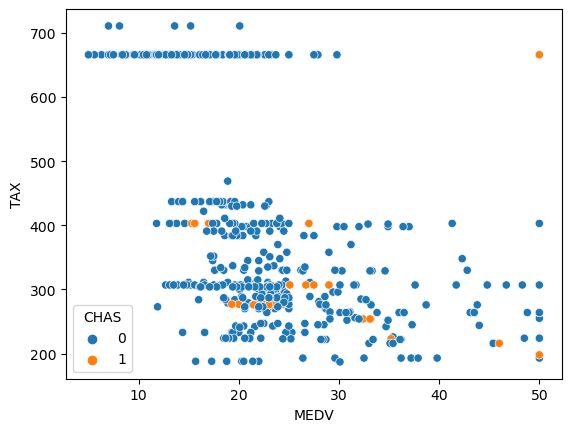

In [33]:
#TAX vs MEDV

sns.scatterplot(data=df, x="MEDV", y="TAX", hue="CHAS", legend=True)
plt.show()

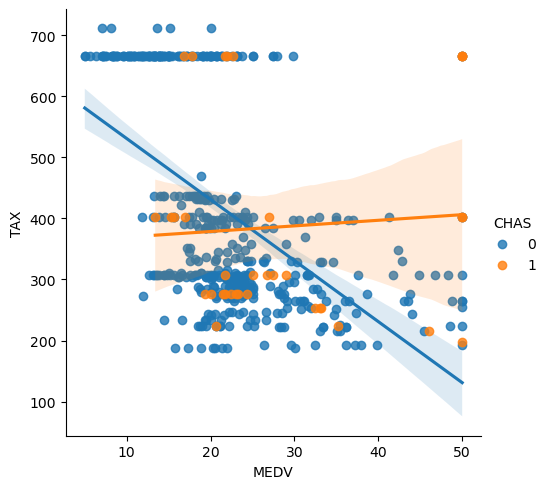

In [34]:
sns.lmplot(x="MEDV", y="TAX", hue="CHAS", data=df, legend=True)
plt.show()

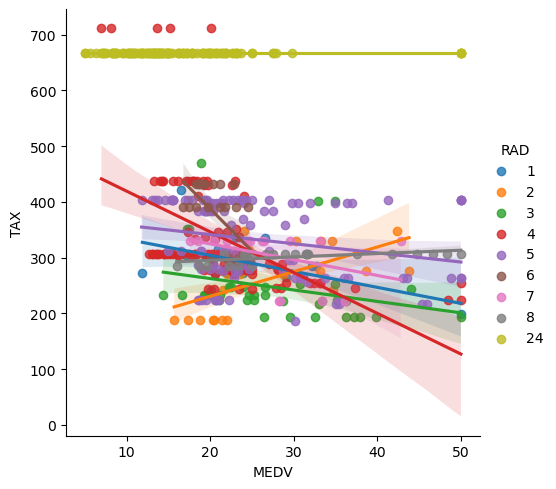

In [35]:
sns.lmplot(x="MEDV", y="TAX", hue="RAD", data=df, legend=True)
plt.show()

TAX (full-value property-tax rate per $10,000) and MEDV have negative correlation (-0.47): if the property tax rate is high, house value would result low.
Interestingly, in case of river proximity, RAD=2 or RAD=8 the correlation becomes slightly positive (being close to the river or having such two RAD indexes actually helps an increase of house price even if property tax increases).

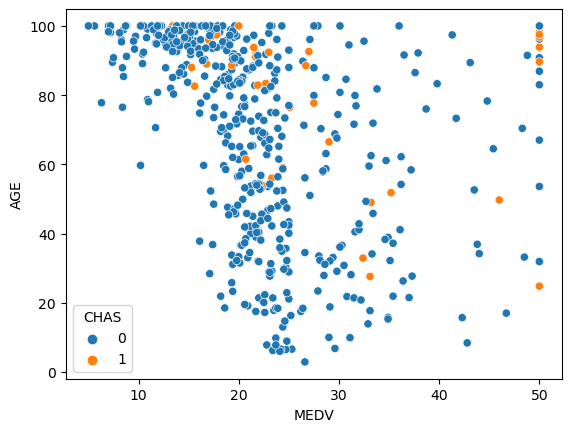

In [36]:
#AGE vs MEDV

sns.scatterplot(data=df, x="MEDV", y="AGE", hue="CHAS", legend=True)
plt.show()

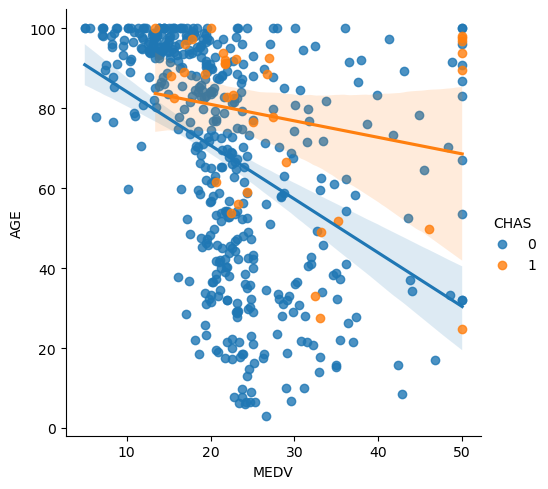

In [37]:
sns.lmplot(x="MEDV", y="AGE", hue="CHAS", data=df, legend=True)
plt.show()

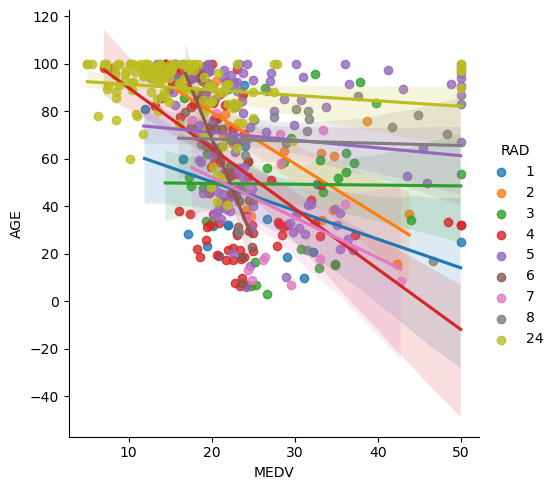

In [38]:
sns.lmplot(x="MEDV", y="AGE", hue="RAD", data=df, legend=True)
plt.show()

AGE (proportion of owner-occupied units built prior to 1940) and MEDV have some negative correlation (-0.38), meaning that the older houses don’t have high median value.
This is generally less pronounced if location is close to the river, and in RAD=24, 5, 8.

In [39]:
#4) ML modeling for prediction

from sklearn.model_selection import train_test_split,cross_val_score

X = df.drop(['MEDV'], axis=1)
y = df['MEDV']

X.sample(3)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
3   0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
60  0.14932  25.0   5.13     0  0.453  5.741  66.2  7.2254    8  284     19.7   
76  0.10153   0.0  12.83     0  0.437  6.279  74.5  4.0522    5  398     18.7   

         B  LSTAT  
3   394.63   2.94  
60  395.11  13.15  
76  373.66  11.97

In [40]:
y.sample(3)

106    19.5
15     19.9
324    25.0
Name: MEDV, dtype: float64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [42]:
#4a) Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

DTR model: evaluation on Train data

In [43]:
y_pred_dtr_tr = dtr.predict(X_train)

In [44]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

print("MSE",round(mean_squared_error(y_train, y_pred_dtr_tr), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_train ,y_pred_dtr_tr)), 3))
print("MAE",round(mean_absolute_error(y_train ,y_pred_dtr_tr), 3))
print("MAPE",round(mean_absolute_percentage_error(y_train, y_pred_dtr_tr), 3))
print("R2 Score : ", round(r2_score(y_train, y_pred_dtr_tr), 3))

MSE 0.0
RMSE 0.0
MAE 0.0
MAPE 0.0
R2 Score :  1.0


DTR model is WAY too good with learning the train data (overfitting?)

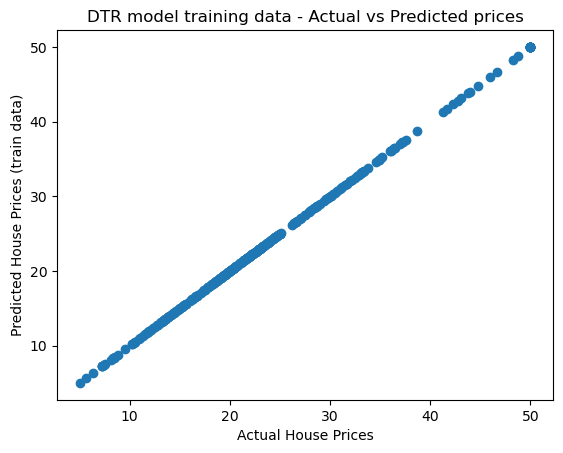

In [45]:
plt.scatter(y_train, y_pred_dtr_tr)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices (train data)")
plt.title("DTR model training data - Actual vs Predicted prices")
plt.show()

DTR model: evaluation on Testing data (predictions)

In [46]:
y_pred_dtr = dtr.predict(X_test)

print("MSE",round(mean_squared_error(y_test,y_pred_dtr), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred_dtr)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred_dtr), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred_dtr), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred_dtr), 3))

MSE 11.588
RMSE 3.404
MAE 2.536
MAPE 0.137
R2 Score :  0.844


Our DTR model for predictions over testing data is performing pretty good. R2=0.844 is ideal, and it allows for low variability also.

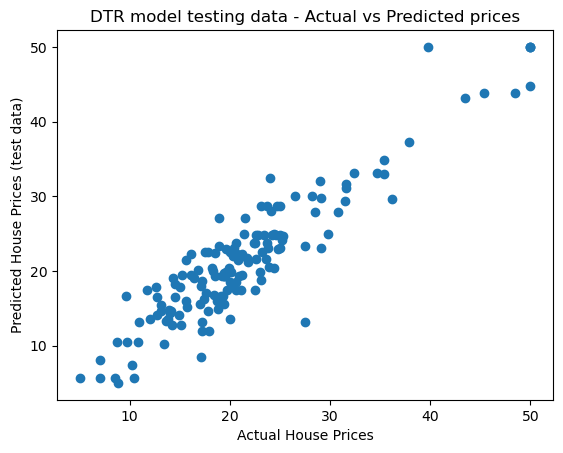

In [47]:
plt.scatter(y_test, y_pred_dtr)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices (test data)")
plt.title("DTR model testing data - Actual vs Predicted prices")
plt.show()

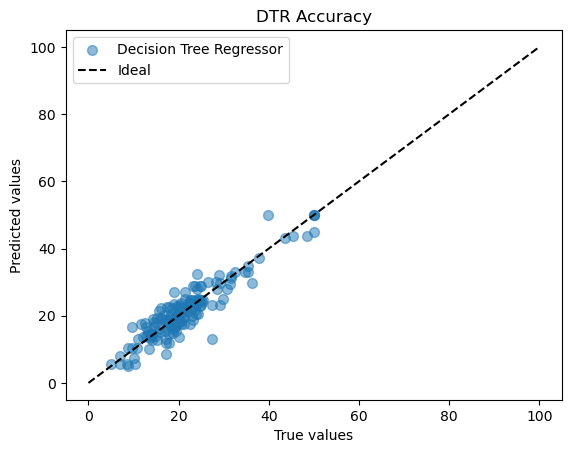

In [48]:
#Another visualization of our DTR model predictions from the test set:

plt.scatter(y_test, y_pred_dtr, label='Decision Tree Regressor', alpha=0.5, s=50)
plt.plot([0, 100], [0, 100], 'k--', label='Ideal')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('DTR Accuracy')
plt.legend()
plt.show()

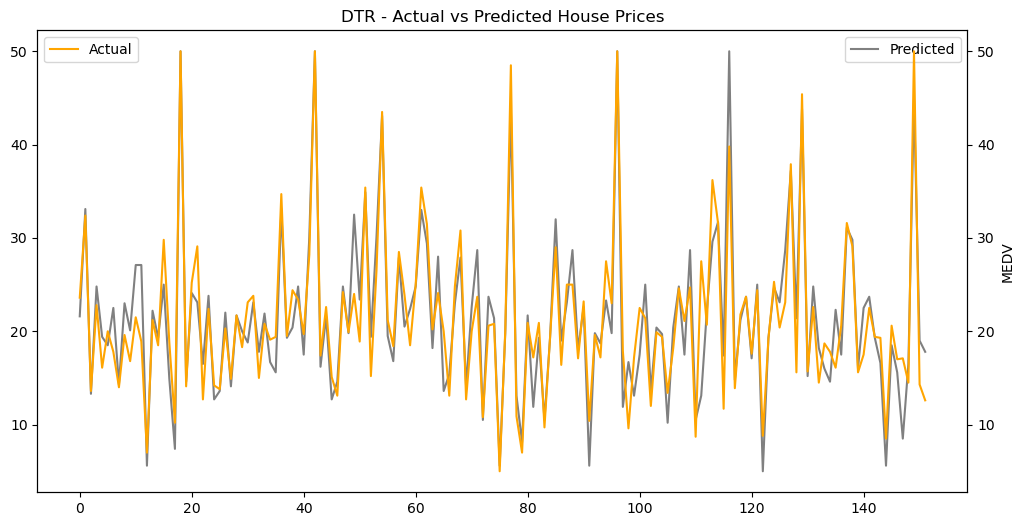

In [49]:
data_points = list(range(len(y_test)))

fig = plt.figure(figsize=(12, 6))
plt.title('DTR - Actual vs Predicted House Prices')

fig = sns.lineplot(x=data_points, 
                   y=y_pred_dtr, 
                   color="grey", 
                   legend='brief', 
                   label = "Predicted")
ax2 = plt.twinx()
fig = sns.lineplot(x=data_points, 
                   y=y_test, 
                   color="orange", 
                   legend='brief', 
                   label = "Actual",
                   ax=ax2)
plt.show()

Overall, good performance from our DTR model.

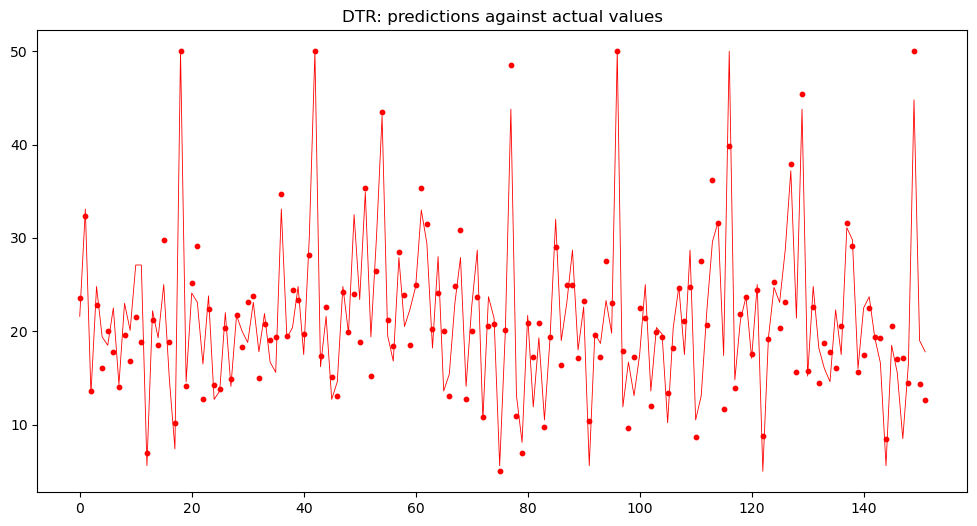

In [50]:
temp = np.arange(0, len(y_test))
plt.figure(figsize=(12,6))
plt.scatter(temp, y_test, color = 'red', s=10)
plt.plot(temp, y_pred_dtr, color = 'r', linewidth=0.6)
plt.title ('DTR: predictions against actual values')
plt.show()

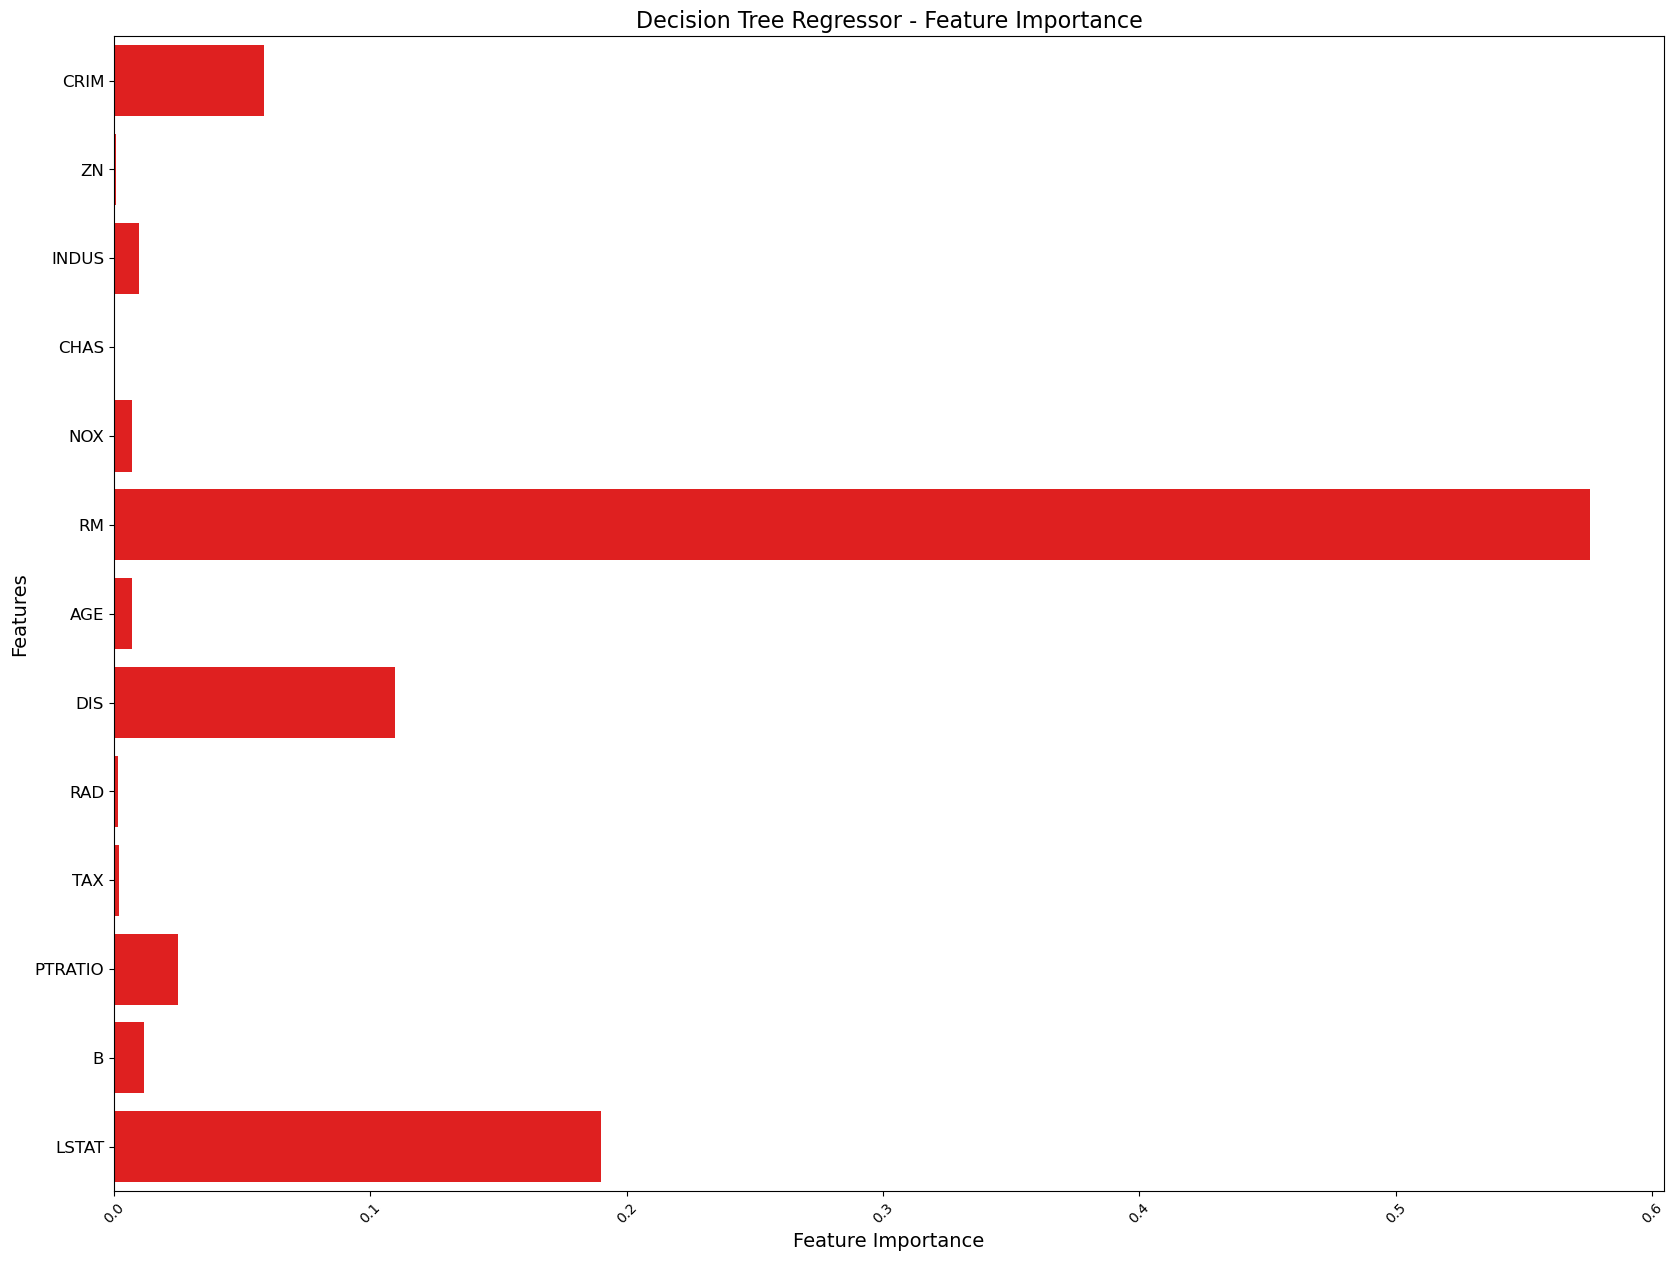

In [51]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x=dtr.feature_importances_, y=X.columns, ax=ax, color='r')
ax.set_xlabel('Feature Importance', fontsize=14)
ax.set_ylabel('Features', fontsize=14)
ax.set_title('Decision Tree Regressor - Feature Importance', fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(rotation=45)
plt.show()

‘RM’ is the most important feature according our DTR model, then followed by ‘LSTAT’, ‘DIS’, ‘CRIM’, ‘PTRATIO’, ‘B’, ‘INDUS’ and then the others. 'CHAS' seems to be irrelevant for our DTR model.

In [52]:
#4b) Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=10, random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

RFR model: Evaluation on Train data

In [53]:
y_pred_rfr_tr = rfr.predict(X_train)

print("MSE",round(mean_squared_error(y_train,y_pred_rfr_tr), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_train,y_pred_rfr_tr)), 3))
print("MAE",round(mean_absolute_error(y_train,y_pred_rfr_tr), 3))
print("MAPE",round(mean_absolute_percentage_error(y_train,y_pred_rfr_tr), 3))
print("R2 Score : ", round(r2_score(y_train,y_pred_rfr_tr), 3))

MSE 3.035
RMSE 1.742
MAE 1.076
MAPE 0.058
R2 Score :  0.965


Our RFR model is doing very good with learning train data

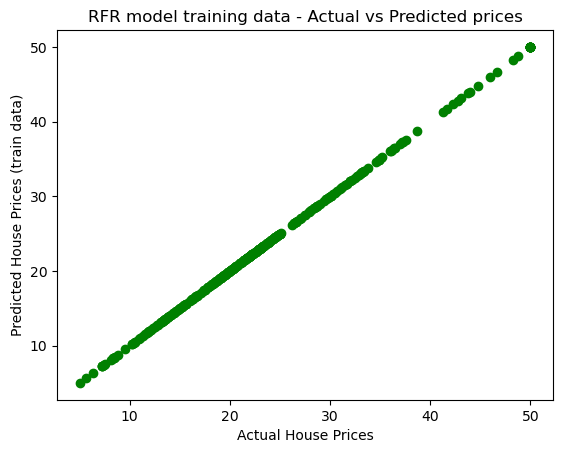

In [54]:
plt.scatter(y_train, y_pred_dtr_tr, color='green')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices (train data)")
plt.title("RFR model training data - Actual vs Predicted prices")
plt.show()

RFR model: Evaluation on Test data (predictions)

In [55]:
y_pred_rfr = rfr.predict(X_test)

print("MSE",round(mean_squared_error(y_test,y_pred_rfr), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred_rfr)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred_rfr), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred_rfr), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred_rfr), 3))

MSE 9.869
RMSE 3.141
MAE 2.185
MAPE 0.117
R2 Score :  0.868


Our RFR model for predictions over testing data is also performing pretty good. R2 is higher (0.868) than the previous DTR model(0.844) and it is ideal, and it reduces variability.

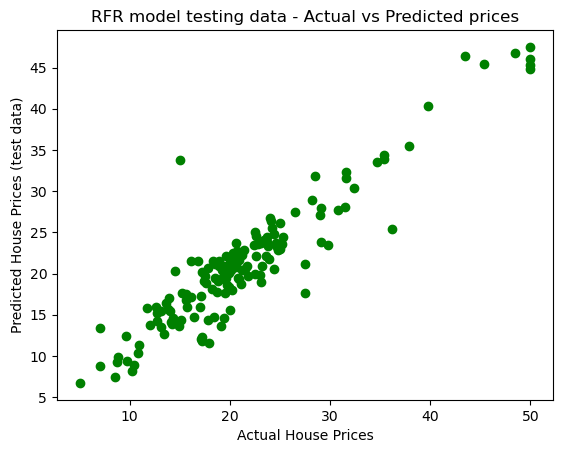

In [56]:
plt.scatter(y_test, y_pred_rfr, color='green')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices (test data)")
plt.title("RFR model testing data - Actual vs Predicted prices")
plt.show()

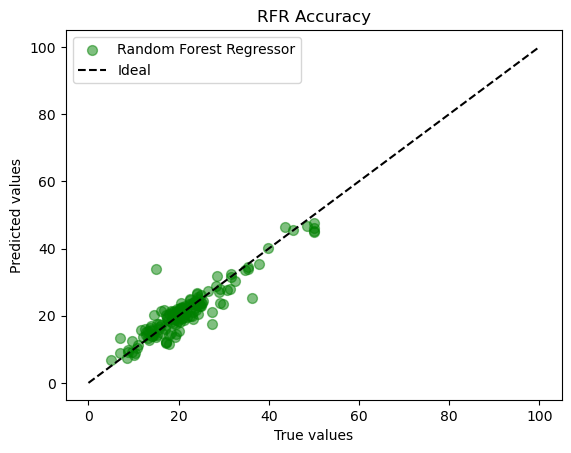

In [57]:
#Another visualization of our RFR model predictions from the test set:

plt.scatter(y_test, y_pred_rfr, label='Random Forest Regressor', alpha=0.5, s=50, color='g')
plt.plot([0, 100], [0, 100], 'k--', label='Ideal')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('RFR Accuracy')
plt.legend()
plt.show()

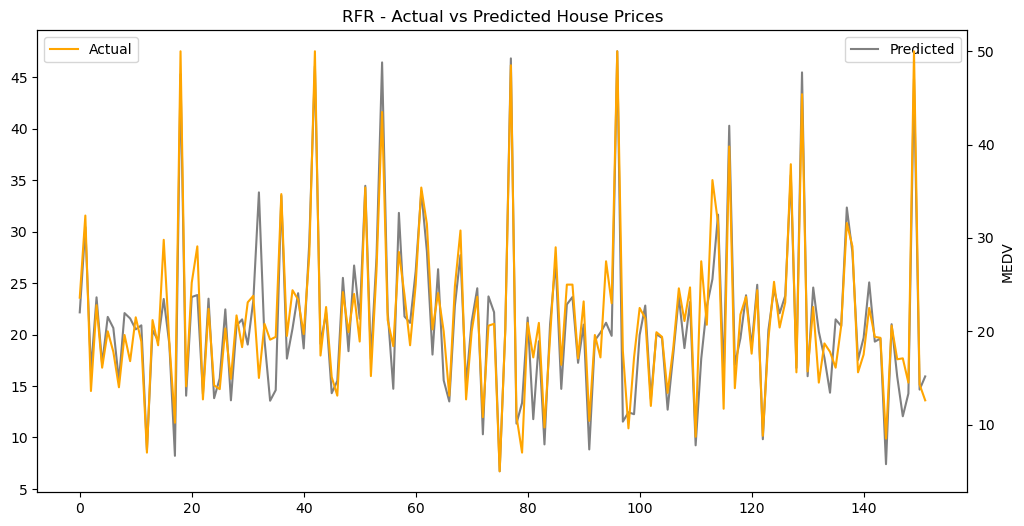

In [58]:
data_points = list(range(len(y_test)))

fig = plt.figure(figsize=(12, 6))
plt.title('RFR - Actual vs Predicted House Prices')

fig = sns.lineplot(x=data_points, 
                   y=y_pred_rfr, 
                   color="grey", 
                   legend='brief', 
                   label = "Predicted")
ax2 = plt.twinx()
fig = sns.lineplot(x=data_points, 
                   y=y_test, 
                   color="orange", 
                   legend='brief', 
                   label = "Actual",
                   ax=ax2)
plt.show()

The RFR model seems to behave pretty good with predictions from the test set

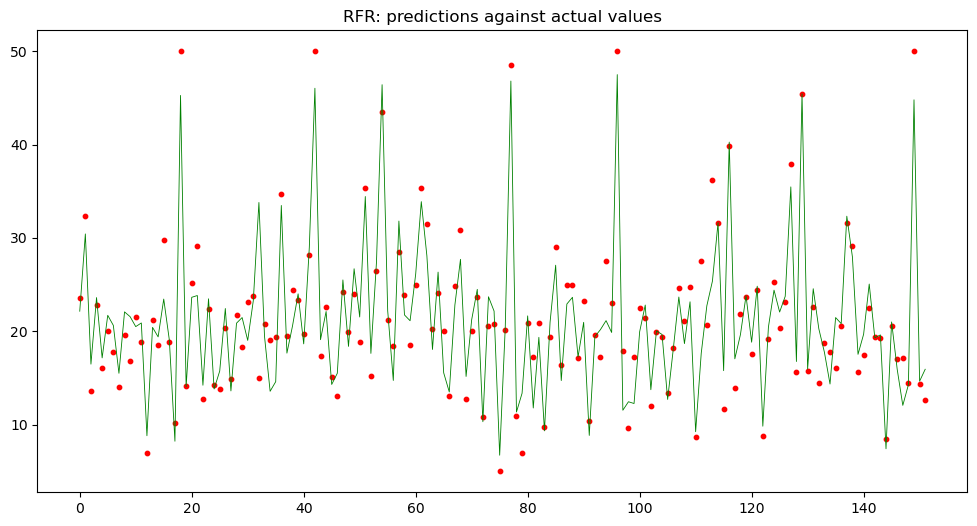

In [59]:
temp = np.arange(0, len(y_test))
plt.figure(figsize=(12,6))
plt.scatter(temp, y_test, color = 'red', s=10)
plt.plot(temp, y_pred_rfr, color = 'g', linewidth=0.6)
plt.title ('RFR: predictions against actual values')
plt.show()

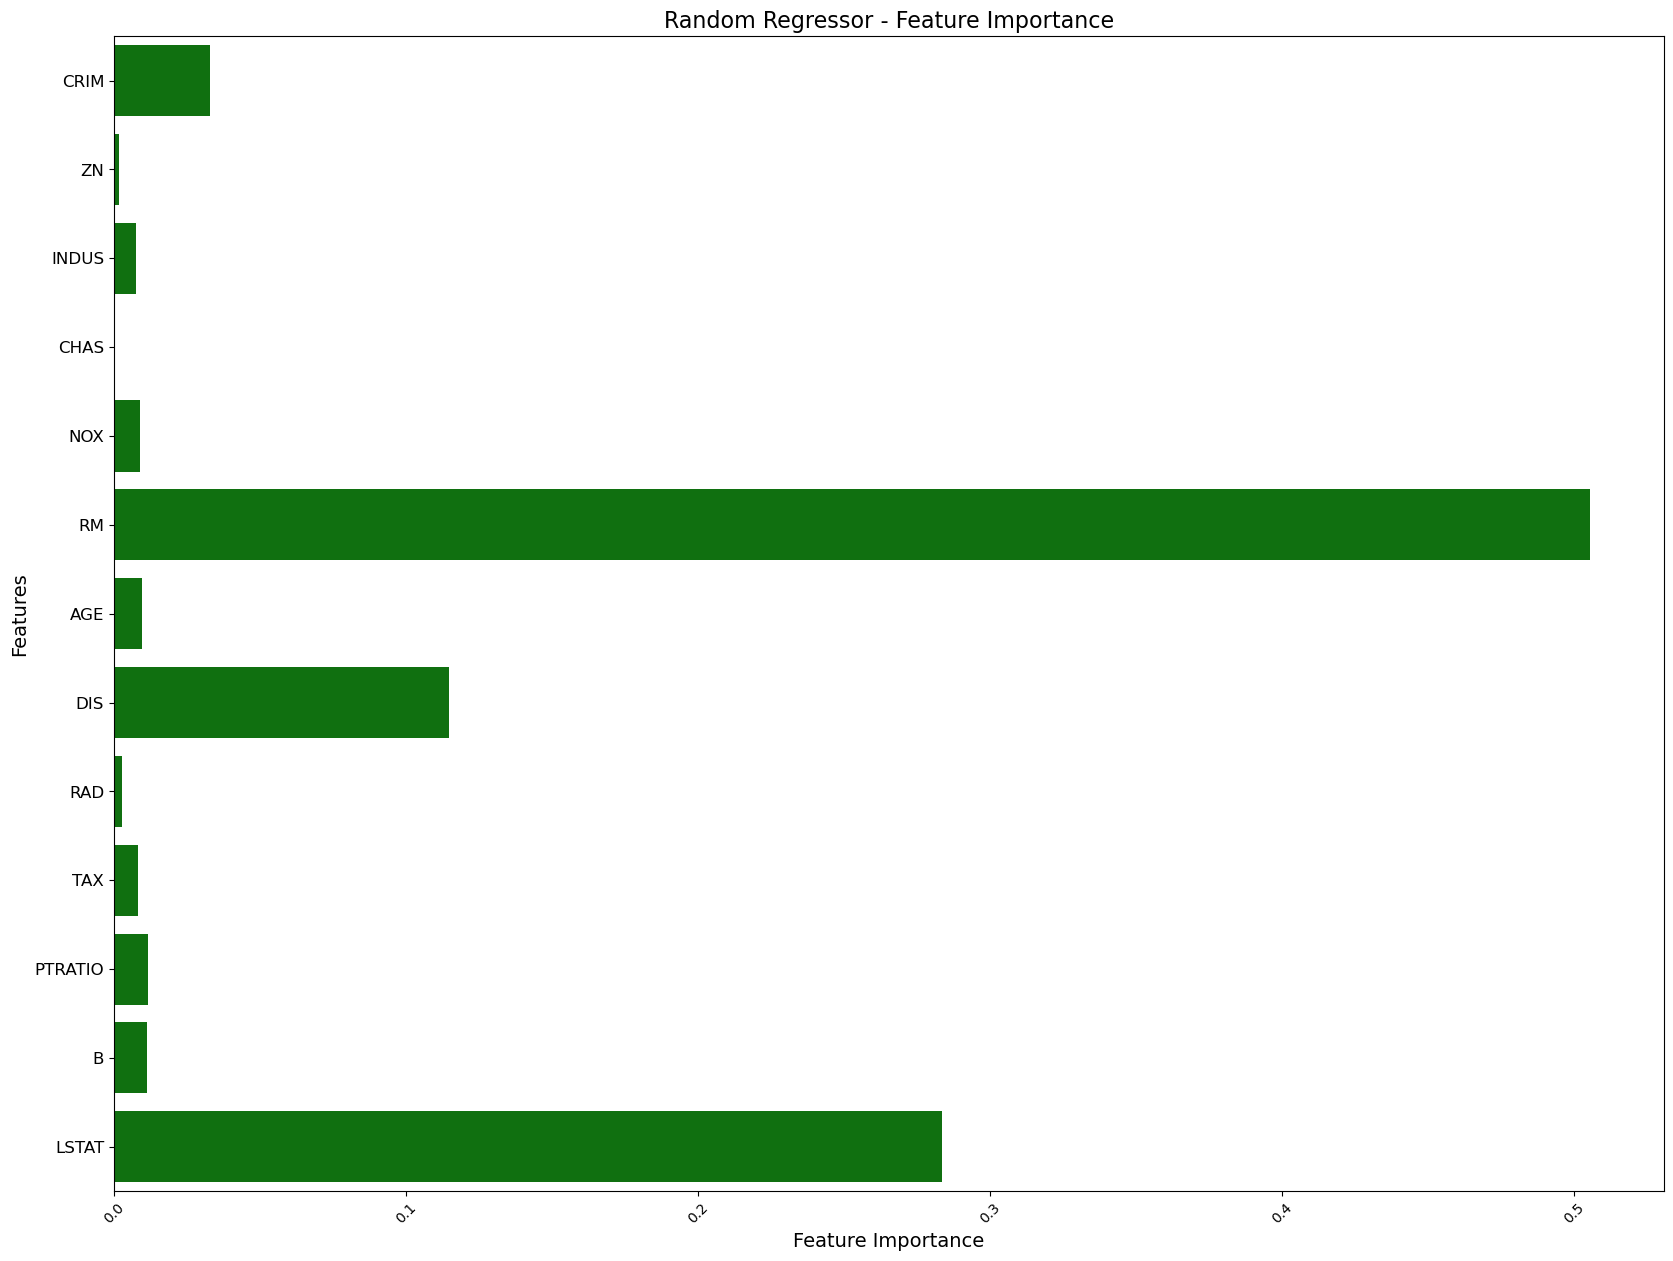

In [60]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x=rfr.feature_importances_, y=X.columns, ax=ax, color='g')
ax.set_xlabel('Feature Importance', fontsize=14)
ax.set_ylabel('Features', fontsize=14)
ax.set_title('Random Regressor - Feature Importance', fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(rotation=45)
plt.show()

Feature importance, as decided by the RFR model. 'RM' is the most important feature, followed by 'LSTAT', 'DIS', 'CRIM' and then the others. In comparison to the DTR model, the proportion of importance has also changed. 'TAX' seem to be more important here than in the DTR model. Still, 'CHAS' is irrelevent for the RFR model as well.

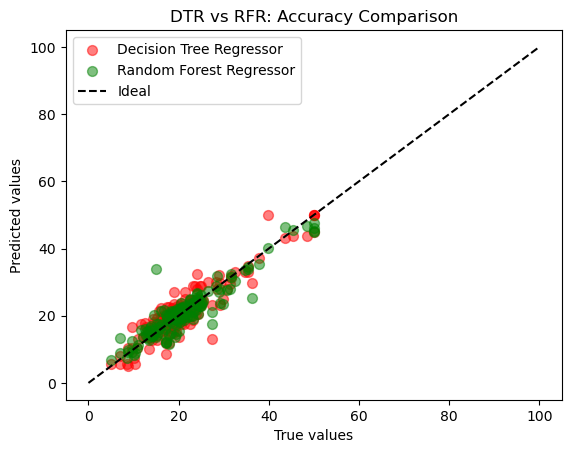

In [61]:
#Comparison between DTR and RFR models

plt.scatter(y_test, y_pred_dtr, label='Decision Tree Regressor', alpha=0.5, s=50, color='r')
plt.scatter(y_test, y_pred_rfr, label='Random Forest Regressor', alpha=0.5, s=50, color='g')
plt.plot([0, 100], [0, 100], 'k--', label='Ideal')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('DTR vs RFR: Accuracy Comparison')
plt.legend()
plt.show()

In [62]:
#4c) XGBoost

import xgboost as xgb

xgboost = xgb.XGBRegressor()
xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

XGBoost model: evaluation on Train data

In [63]:
y_pred_xgb_tr = xgboost.predict(X_train)

print("MSE",round(mean_squared_error(y_train, y_pred_xgb_tr), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_train ,y_pred_xgb_tr)), 3))
print("MAE",round(mean_absolute_error(y_train ,y_pred_xgb_tr), 3))
print("MAPE",round(mean_absolute_percentage_error(y_train, y_pred_xgb_tr), 3))
print("R2 Score : ", round(r2_score(y_train, y_pred_xgb_tr), 3))

MSE 0.0
RMSE 0.014
MAE 0.01
MAPE 0.0
R2 Score :  1.0


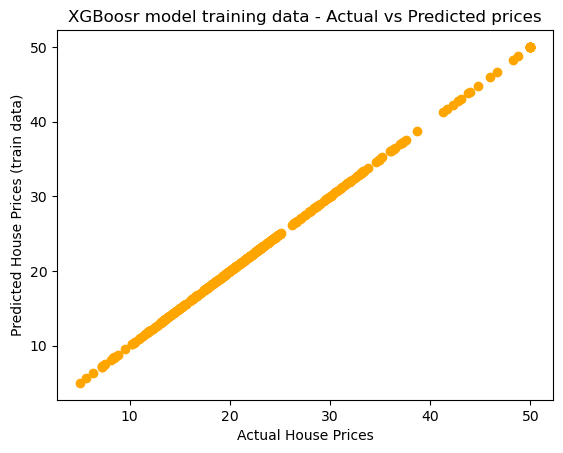

In [64]:
plt.scatter(y_train, y_pred_xgb_tr, color='orange')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices (train data)")
plt.title("XGBoosr model training data - Actual vs Predicted prices")
plt.show()

XGBoost model: evaluation on Test data

In [65]:
y_pred_xgb = xgboost.predict(X_test)

print("MSE",round(mean_squared_error(y_test,y_pred_xgb), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred_xgb)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred_xgb), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred_xgb), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred_xgb), 3))

MSE 9.239
RMSE 3.04
MAE 2.091
MAPE 0.11
R2 Score :  0.876


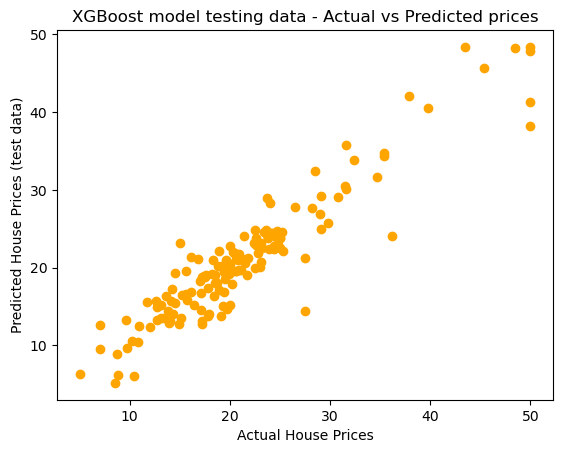

In [66]:
plt.scatter(y_test, y_pred_xgb, color='orange')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices (test data)")
plt.title("XGBoost model testing data - Actual vs Predicted prices")
plt.show()

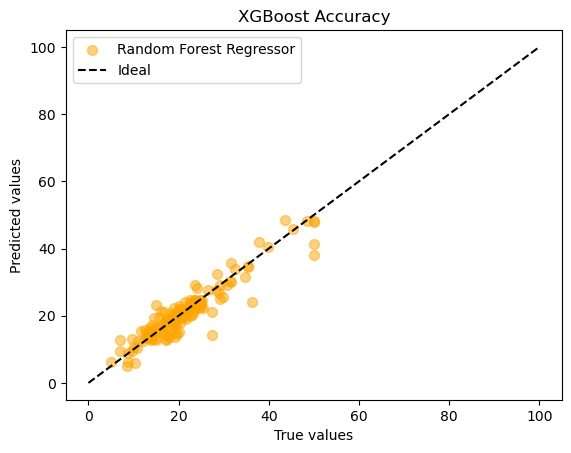

In [67]:
#Another visualization of our XGB model predictions from the test set:

plt.scatter(y_test, y_pred_xgb, label='Random Forest Regressor', alpha=0.5, s=50, color='orange')
plt.plot([0, 100], [0, 100], 'k--', label='Ideal')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('XGBoost Accuracy')
plt.legend()
plt.show()

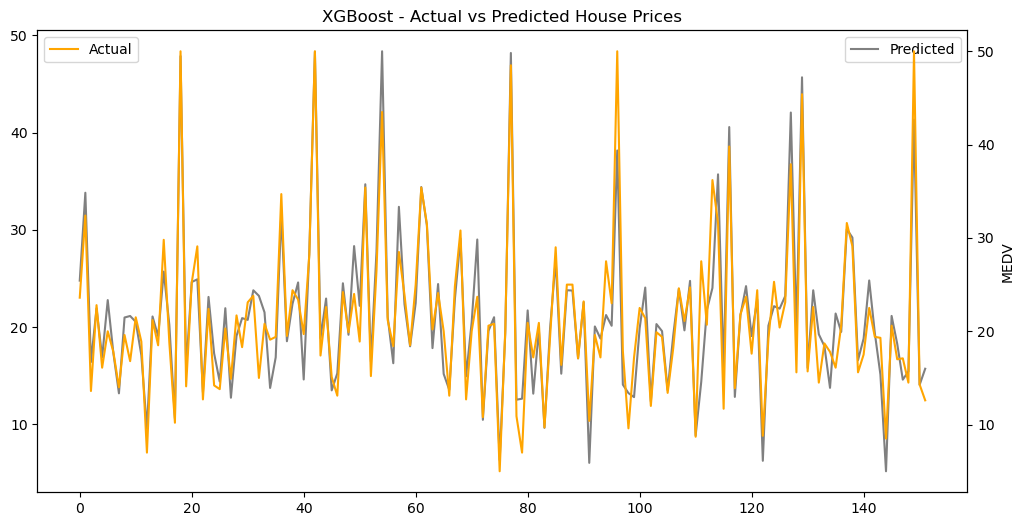

In [68]:
data_points = list(range(len(y_test)))

fig = plt.figure(figsize=(12, 6))
plt.title('XGBoost - Actual vs Predicted House Prices')

fig = sns.lineplot(x=data_points, 
                   y=y_pred_xgb, 
                   color="grey", 
                   legend='brief', 
                   label = "Predicted")
ax2 = plt.twinx()
fig = sns.lineplot(x=data_points, 
                   y=y_test, 
                   color="orange", 
                   legend='brief', 
                   label = "Actual",
                   ax=ax2)
plt.show()

Good performance from the XGBoost model, which is maybe less peaky with predictions from actual values from y_test than RFR (still, the two models are very close).

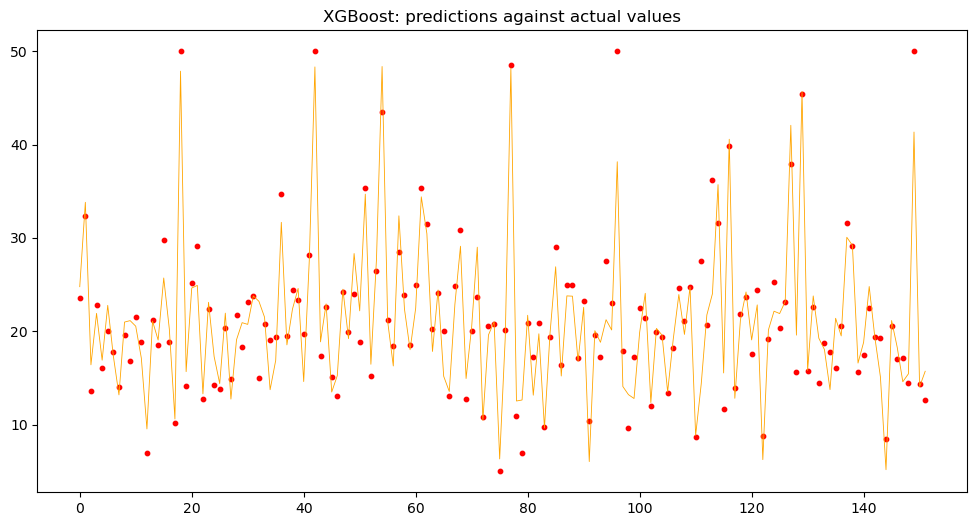

In [69]:
temp = np.arange(0, len(y_test))
plt.figure(figsize=(12,6))
plt.scatter(temp, y_test, color = 'red', s=10)
plt.plot(temp, y_pred_xgb, color = 'orange', linewidth=0.6)
plt.title ('XGBoost: predictions against actual values')
plt.show()

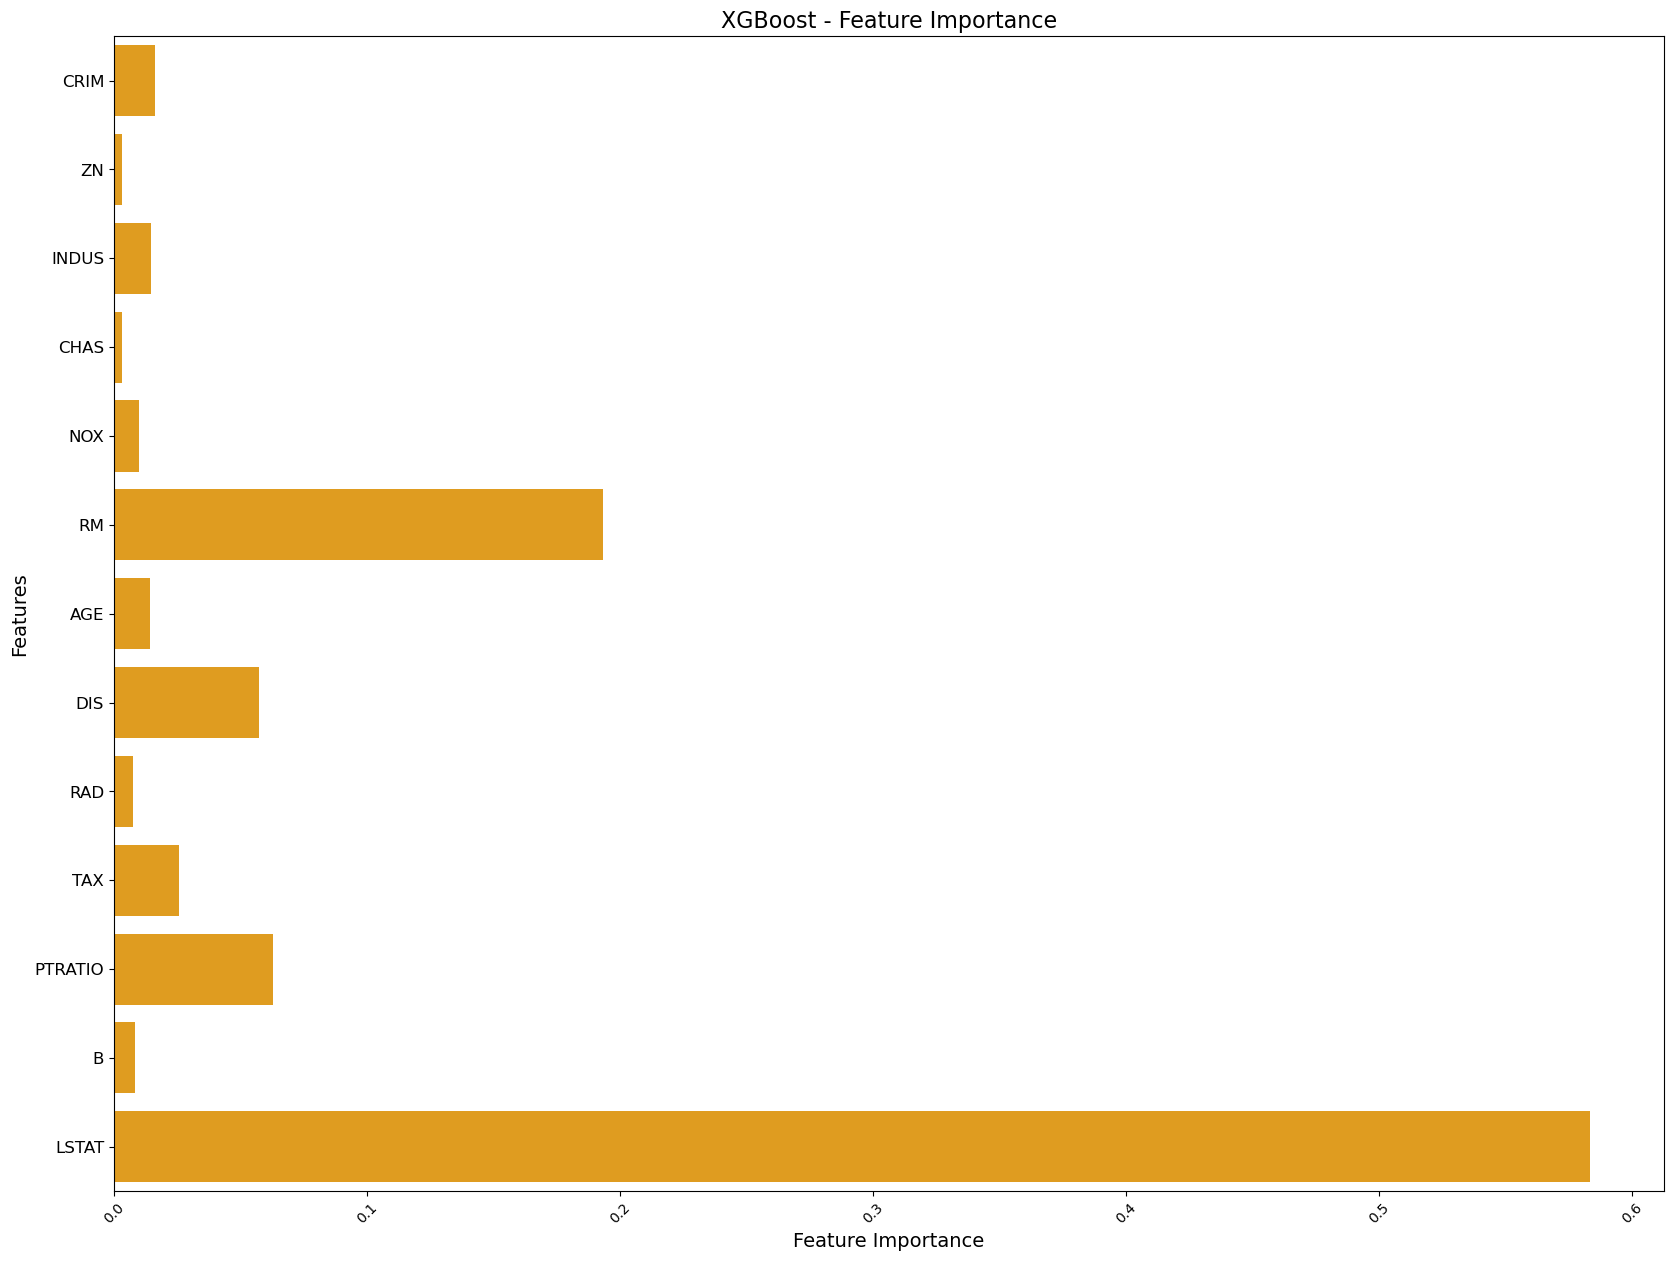

In [70]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x=xgboost.feature_importances_, y=X.columns, ax=ax, color='orange')
ax.set_xlabel('Feature Importance', fontsize=14)
ax.set_ylabel('Features', fontsize=14)
ax.set_title('XGBoost - Feature Importance', fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(rotation=45)
plt.show()

#XGBoost considers ‘LSTAT’ as the most important feature. ‘RM’ is second-best, then we have ‘PTRATIO’, ’DIS’ and ‘TAX’, and the others have marginal importance. This is different than the RFR model, which had ‘RM’ as most important feature (followed by ‘LSTAT', 'DIS', ‘CRIM' and the others). Also in XGBoost we see that ‘ZN’ and ‘CHAS’ are the last important features.

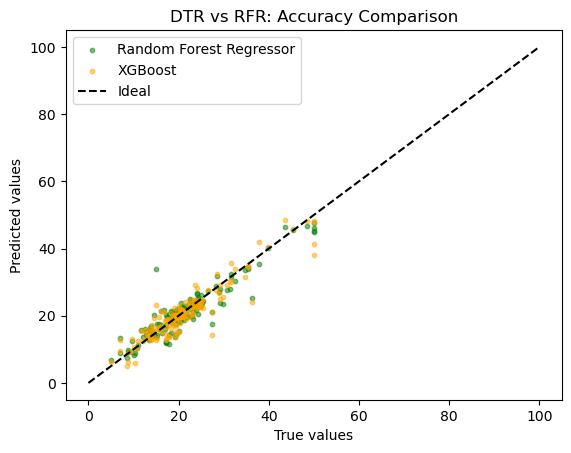

In [71]:
#Comparison between RFR and XGBoost models

plt.scatter(y_test, y_pred_rfr, label='Random Forest Regressor', alpha=0.5, s=10, color='g')
plt.scatter(y_test, y_pred_xgb, label='XGBoost', alpha=0.5, s=10, color='orange')
plt.plot([0, 100], [0, 100], 'k--', label='Ideal')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('DTR vs RFR: Accuracy Comparison')
plt.legend()
plt.show()

DTR, RFR and XGBoost are all tree-based ML models use feature importance, feature interaction and are robust to outliers, hence they are ok to use without scaling data.
Distance-based models instead require scaling, because they are susceptible to magnitude and range of the input features. By scaling data, we bring features to a similar scale, allowing the model to make fair and balanced comparisons between the features.

In [72]:
#4d) Linear Regression

from sklearn.preprocessing import StandardScaler

#Data scaling

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [74]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression().fit(X_train_std,y_train)

lr.coef_

array([-1.10834602,  0.80843998,  0.34313466,  0.81386426, -1.79804295,
        2.913858  , -0.29893918, -2.94251148,  2.09419303, -1.44706731,
       -2.05232232,  1.02375187, -3.88579002])

In [75]:
lr.intercept_

23.01581920903955

LR model: Evaluation on Train data

In [76]:
y_pred_lr_tr = lr.predict(X_train_std)

print("MSE",round(mean_squared_error(y_train,y_pred_lr_tr), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_train,y_pred_lr_tr)), 3))
print("MAE",round(mean_absolute_error(y_train,y_pred_lr_tr), 3))
print("MAPE",round(mean_absolute_percentage_error(y_train,y_pred_lr_tr), 3))
print("R2 Score : ", round(r2_score(y_train,y_pred_lr_tr), 3))

MSE 22.545
RMSE 4.748
MAE 3.357
MAPE 0.166
R2 Score :  0.743


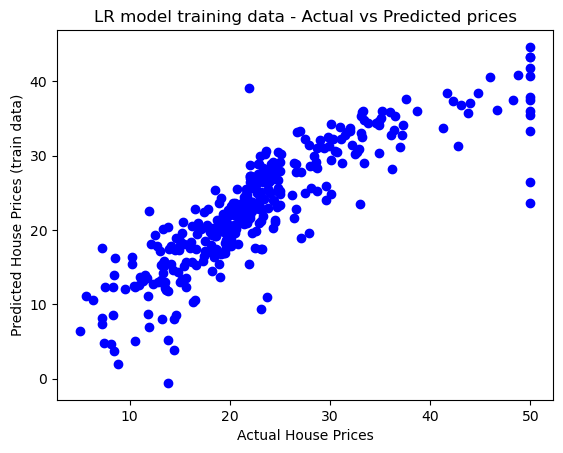

In [77]:
plt.scatter(y_train, y_pred_lr_tr, color='blue')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices (train data)")
plt.title("LR model training data - Actual vs Predicted prices")
plt.show()

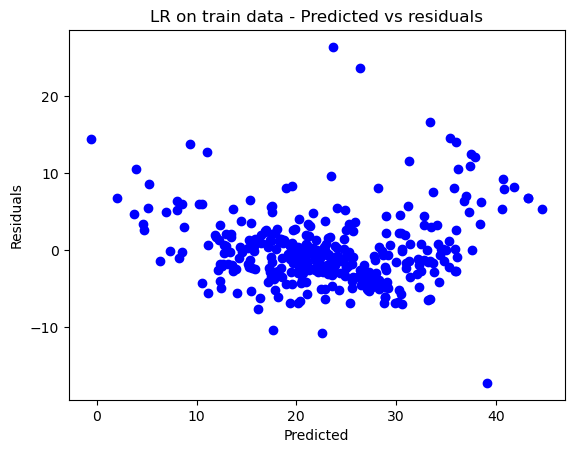

In [78]:
plt.scatter(y_pred_lr_tr,y_train-y_pred_lr_tr, color='b')
plt.title("LR on train data - Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

Most LR residuals are nested at around 0, so linearity assumption is met.

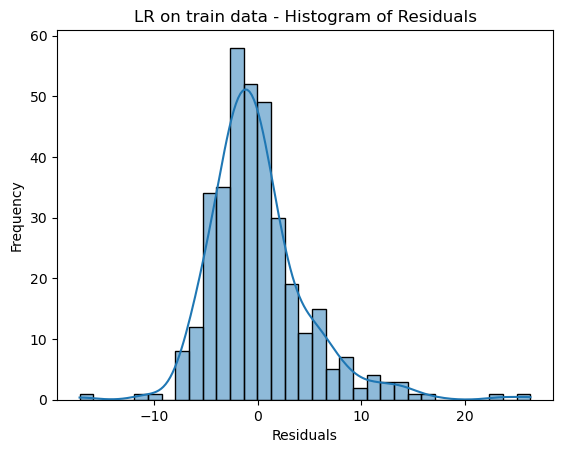

In [79]:
sns.histplot(y_train - y_pred_lr_tr, kde=True)
plt.title("LR on train data - Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

LR residuals follow a Normal distribution (normality assumption confirmed).

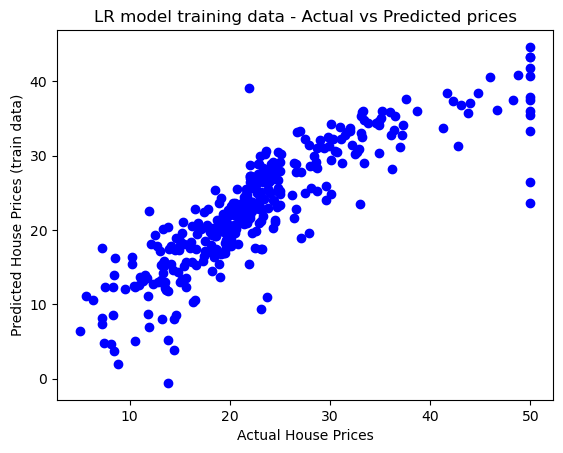

In [80]:
plt.scatter(y_train, y_pred_lr_tr, color='blue')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices (train data)")
plt.title("LR model training data - Actual vs Predicted prices")
plt.show()

LR model: evaluation on Test data (predictions)

In [81]:
y_pred_lr = lr.predict(X_test_std)

print("MSE",round(mean_squared_error(y_test,y_pred_lr), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred_lr)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred_lr), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred_lr), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred_lr), 3))

MSE 21.517
RMSE 4.639
MAE 3.163
MAPE 0.165
R2 Score :  0.711


The LR has similar R2 score for both train and test sets, so it doesn't seem to suffer from overfitting.

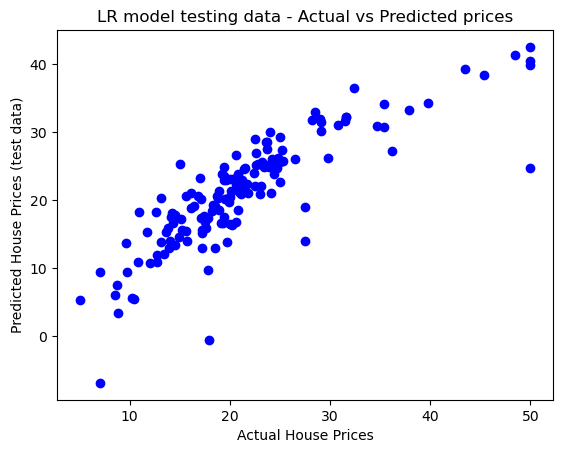

In [82]:
plt.scatter(y_test, y_pred_lr, color='blue')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices (test data)")
plt.title("LR model testing data - Actual vs Predicted prices")
plt.show()

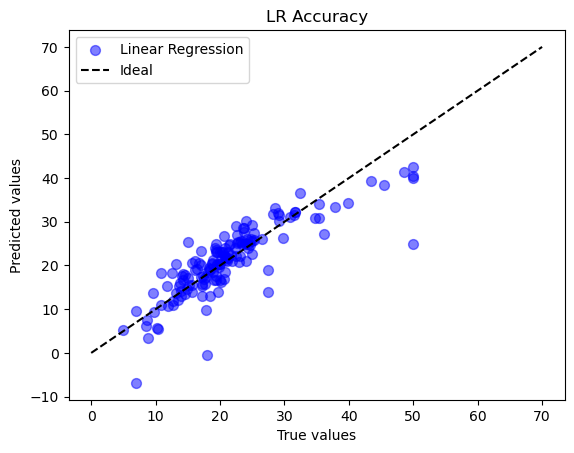

In [83]:
#Another visualization

plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.5, s=50, color='b')
plt.plot([0, 70], [0, 70], 'k--', label='Ideal')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('LR Accuracy')
plt.legend()
plt.show()

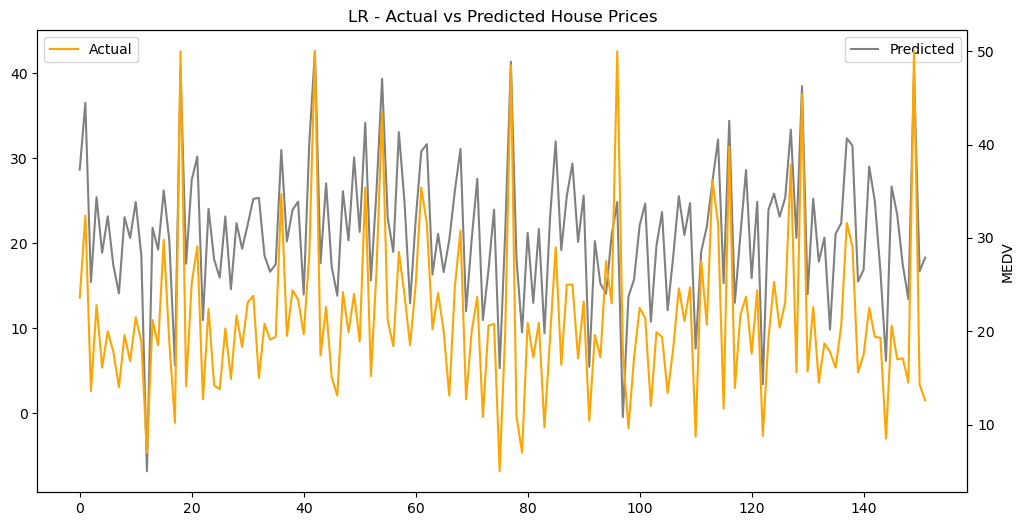

In [84]:
data_points = list(range(len(y_test)))

fig = plt.figure(figsize=(12, 6))
plt.title('LR - Actual vs Predicted House Prices')

fig = sns.lineplot(x=data_points, 
                   y=y_pred_lr, 
                   color="grey", 
                   legend='brief', 
                   label = "Predicted")
ax2 = plt.twinx()
fig = sns.lineplot(x=data_points, 
                   y=y_test, 
                   color="orange", 
                   legend='brief', 
                   label = "Actual",
                   ax=ax2)
plt.show()

The LR model seems to be overestimating predictions in comparison to the actual values from y_test.

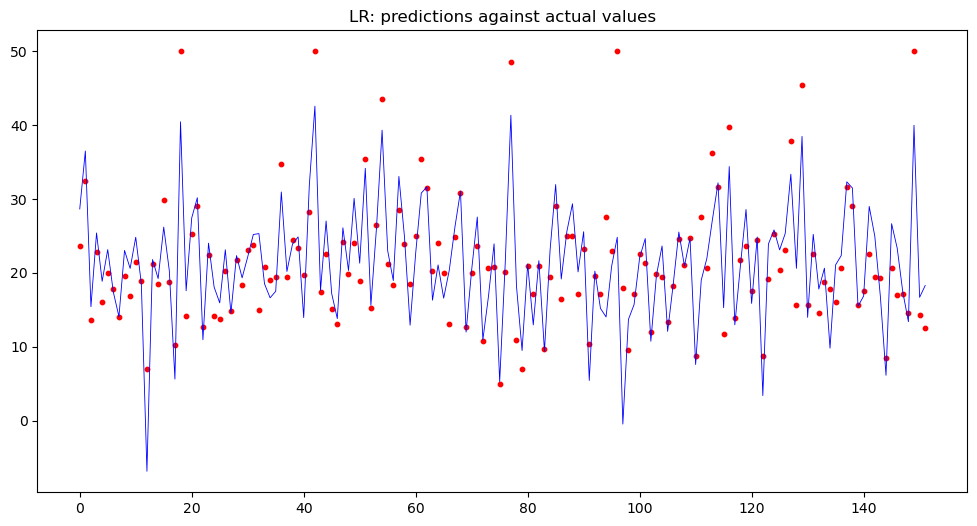

In [85]:
temp = np.arange(0, len(y_test))
plt.figure(figsize=(12,6))
plt.scatter(temp, y_test, color = 'red', s=10)
plt.plot(temp, y_pred_lr, color = 'blue', linewidth=0.6)
plt.title ('LR: predictions against actual values')
plt.show()

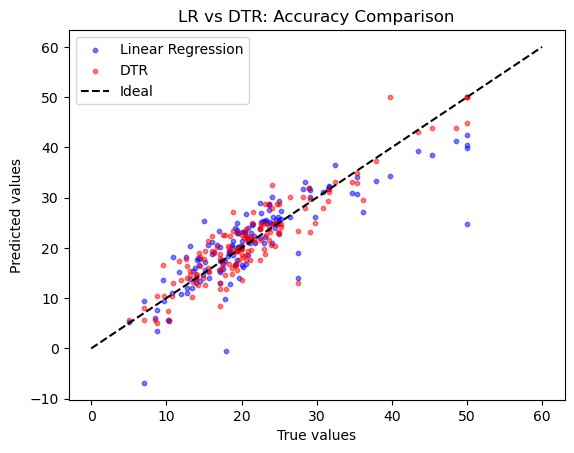

In [86]:
#Comparison between LR and DTR models

plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.5, s=10, color='b')
plt.scatter(y_test, y_pred_dtr, label='DTR', alpha=0.5, s=10, color='red')
plt.plot([0, 60], [0, 60], 'k--', label='Ideal')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('LR vs DTR: Accuracy Comparison')
plt.legend()
plt.show()

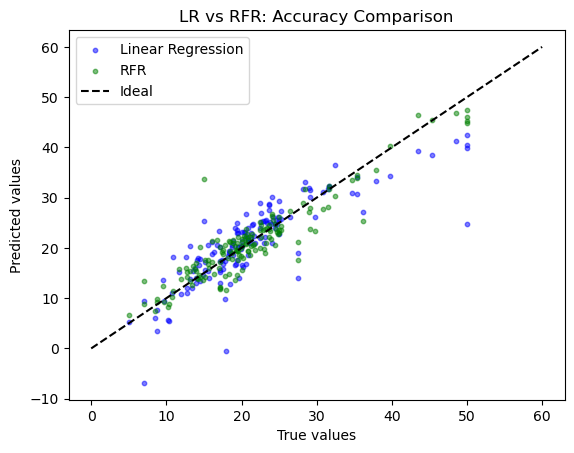

In [87]:
#Comparison between LR and RFR models

plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.5, s=10, color='b')
plt.scatter(y_test, y_pred_rfr, label='RFR', alpha=0.5, s=10, color='g')
plt.plot([0, 60], [0, 60], 'k--', label='Ideal')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('LR vs RFR: Accuracy Comparison')
plt.legend()
plt.show()

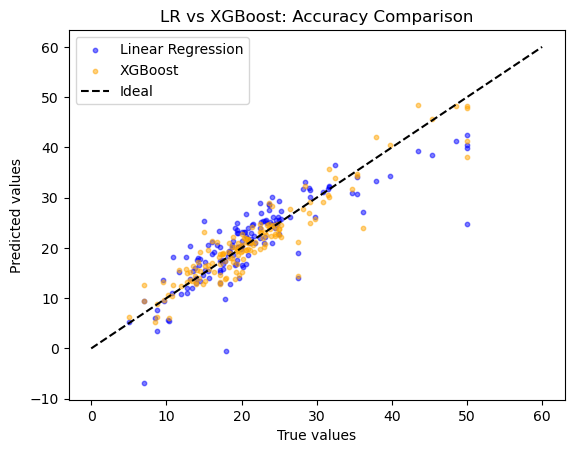

In [88]:
#Comparison between LR and XGBoost models

plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.5, s=10, color='b')
plt.scatter(y_test, y_pred_xgb, label='XGBoost', alpha=0.5, s=10, color='orange')
plt.plot([0, 60], [0, 60], 'k--', label='Ideal')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('LR vs XGBoost: Accuracy Comparison')
plt.legend()
plt.show()

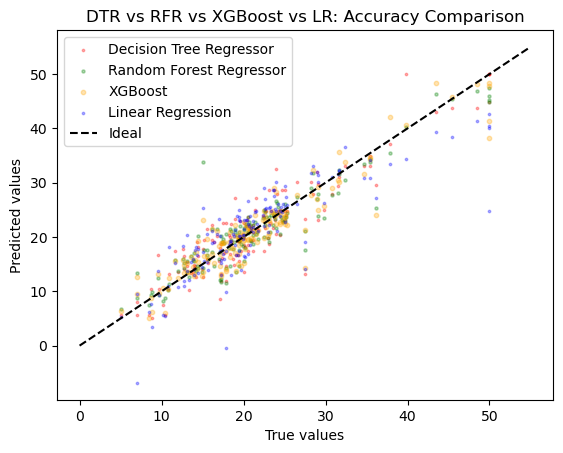

In [89]:
#DTR vs RFR vs XGBoost vs LR: Accuracy Comparison

plt.scatter(y_test, y_pred_dtr, label='Decision Tree Regressor', alpha=0.3, s=3, color='r')
plt.scatter(y_test, y_pred_rfr, label='Random Forest Regressor', alpha=0.3, s=5, color='g')
plt.scatter(y_test, y_pred_xgb, label='XGBoost', alpha=0.3, s=10, color='orange')
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.3, s=3, color='b')
plt.plot([0, 55], [0, 55], 'k--', label='Ideal')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('DTR vs RFR vs XGBoost vs LR: Accuracy Comparison')
plt.legend()
plt.show()

In [90]:
#4e) LASSO Regression

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 1)
lasso_reg.fit(X_train_std,y_train)

Lasso(alpha=1)

In [91]:
lasso_reg.coef_

array([-0.        ,  0.        , -0.        ,  0.22497382, -0.        ,
        2.73102016, -0.        , -0.        , -0.        , -0.        ,
       -1.24748188,  0.26711155, -3.75408325])

In [92]:
lasso_reg.intercept_

23.01581920903955

LASSO Regression model: Evaluation on Train data

In [93]:
y_pred_las_tr = lasso_reg.predict(X_train_std)

print("MSE",round(mean_squared_error(y_train,y_pred_las_tr), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_train,y_pred_las_tr)), 3))
print("MAE",round(mean_absolute_error(y_train,y_pred_las_tr), 3))
print("MAPE",round(mean_absolute_percentage_error(y_train,y_pred_las_tr), 3))
print("R2 Score : ", round(r2_score(y_train,y_pred_las_tr), 3))

MSE 28.446
RMSE 5.333
MAE 3.702
MAPE 0.187
R2 Score :  0.676


When modeling on the train dataset, the Lasso Regression model has somehow small variability, but lower R2 compared to LR.

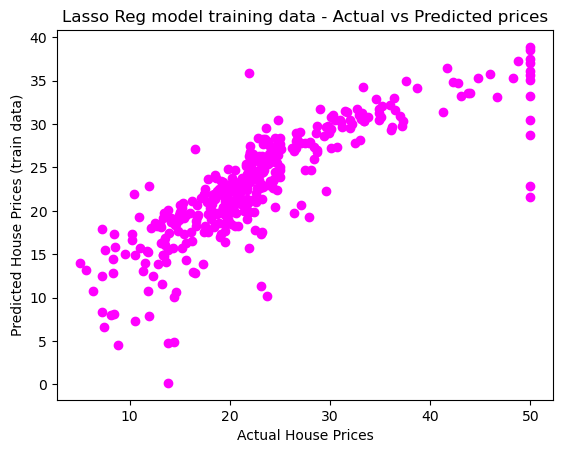

In [94]:
plt.scatter(y_train, y_pred_las_tr, color='magenta')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices (train data)")
plt.title("Lasso Reg model training data - Actual vs Predicted prices")
plt.show()

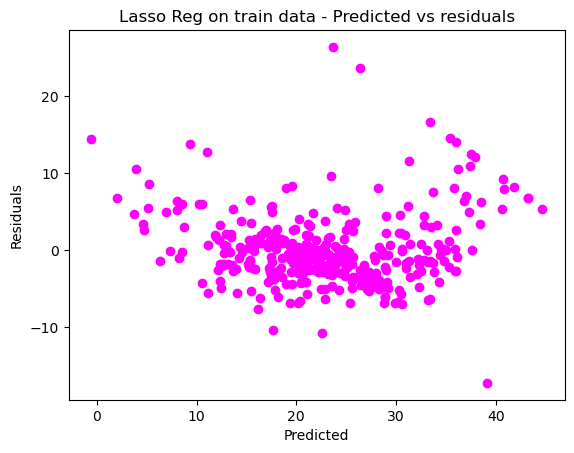

In [95]:
plt.scatter(y_pred_lr_tr,y_train-y_pred_lr_tr, color='magenta')
plt.title("Lasso Reg on train data - Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

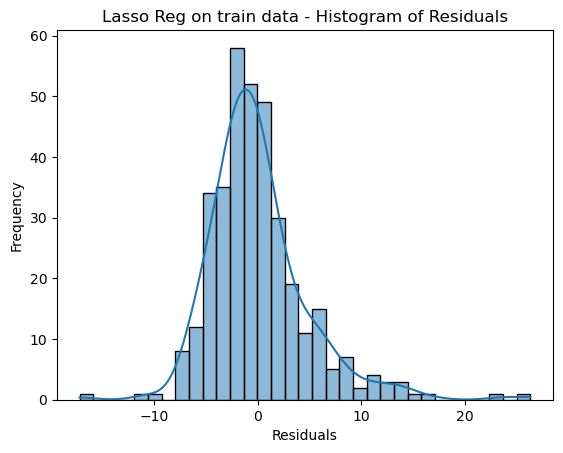

In [96]:
sns.histplot(y_train - y_pred_lr_tr, kde=True)
plt.title("Lasso Reg on train data - Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

LASSO regression residuals scatter around 0, and distribute normally.

LASSO Regression model: Evaluation on Test data (predictions)

In [97]:
y_pred_las = lasso_reg.predict(X_test_std)

print("MSE",round(mean_squared_error(y_test,y_pred_las), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred_las)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred_las), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred_las), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred_las), 3))

MSE 26.532
RMSE 5.151
MAE 3.69
MAPE 0.192
R2 Score :  0.644


Again, also for predictions on y_test Lasso Regression has small variability, but lower R2 score than LR.

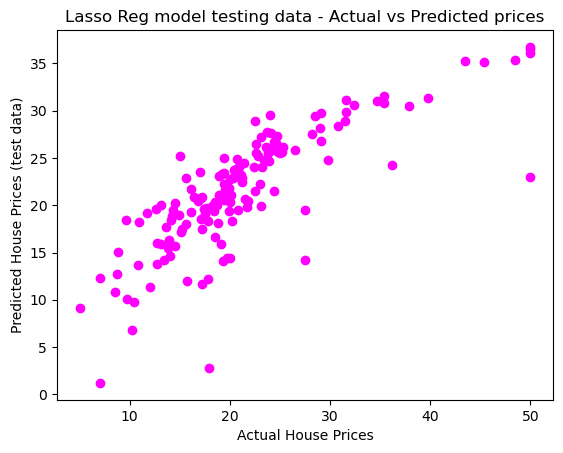

In [98]:
plt.scatter(y_test, y_pred_las, color='magenta')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices (test data)")
plt.title("Lasso Reg model testing data - Actual vs Predicted prices")
plt.show()

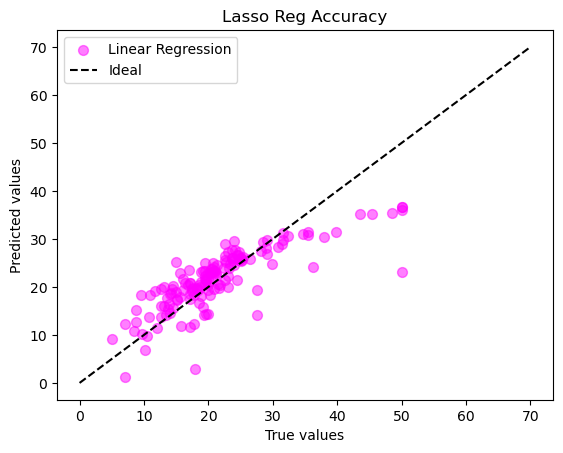

In [99]:
#Another visualization

plt.scatter(y_test, y_pred_las, label='Linear Regression', alpha=0.5, s=50, color='magenta')
plt.plot([0, 70], [0, 70], 'k--', label='Ideal')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Lasso Reg Accuracy')
plt.legend()
plt.show()

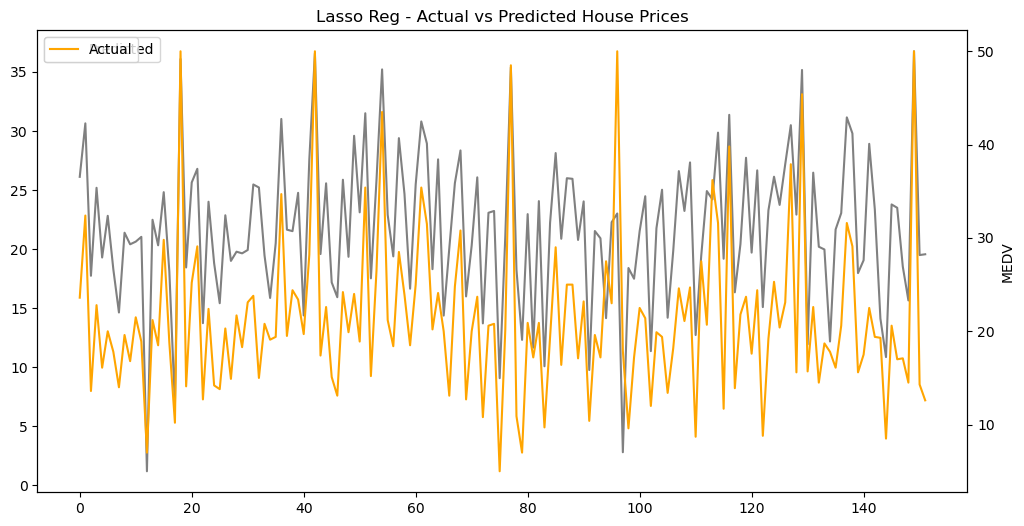

In [100]:
data_points = list(range(len(y_test)))

fig = plt.figure(figsize=(12, 6))
plt.title('Lasso Reg - Actual vs Predicted House Prices')

fig = sns.lineplot(x=data_points, 
                   y=y_pred_las, 
                   color="grey", 
                   legend='brief', 
                   label = "Predicted")
ax2 = plt.twinx()
fig = sns.lineplot(x=data_points, 
                   y=y_test, 
                   color="orange", 
                   legend='brief', 
                   label = "Actual",
                   ax=ax2)
plt.show()

Lasso Regression also produces overestimated predictions, maybe more 'extreme', as the LR model.

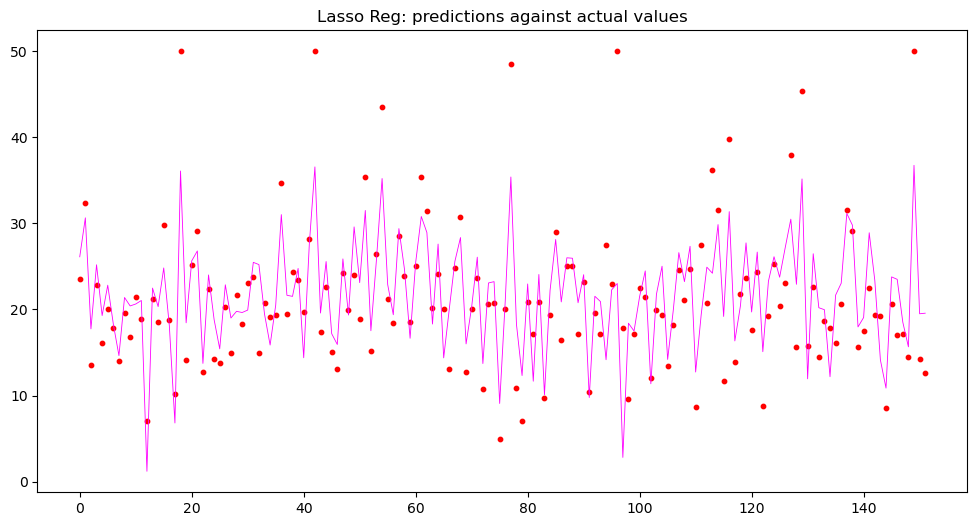

In [101]:
temp = np.arange(0, len(y_test))
plt.figure(figsize=(12,6))
plt.scatter(temp, y_test, color = 'red', s=10)
plt.plot(temp, y_pred_las, color = 'magenta', linewidth=0.6)
plt.title ('Lasso Reg: predictions against actual values')
plt.show()

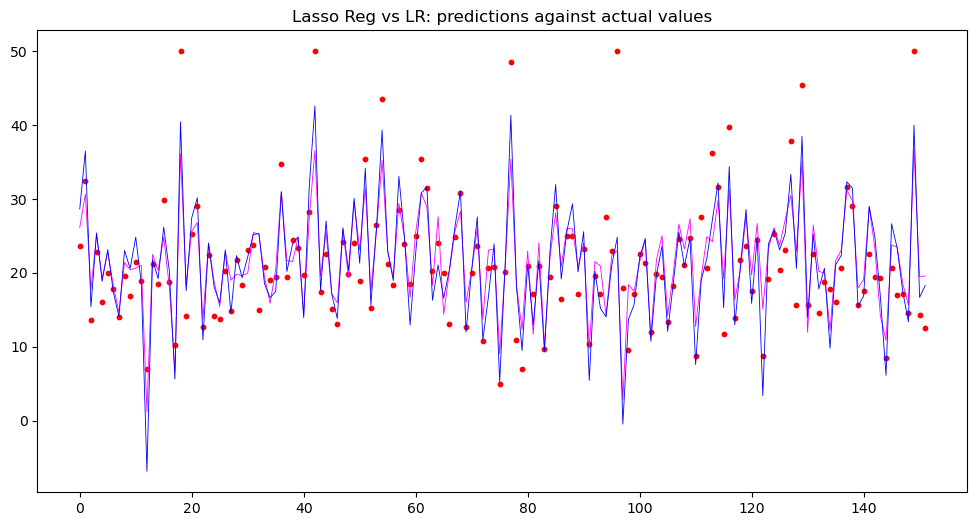

In [102]:
#Comparison between LR and Lasso models

temp = np.arange(0, len(y_test))
plt.figure(figsize=(12,6))
plt.scatter(temp, y_test, color = 'red', s=10)
plt.plot(temp, y_pred_las, color = 'magenta', label='Lasso',linewidth=0.6)
plt.plot(temp, y_pred_lr, color = 'b', label='LR',linewidth=0.6)
plt.title ('Lasso Reg vs LR: predictions against actual values')
plt.show()

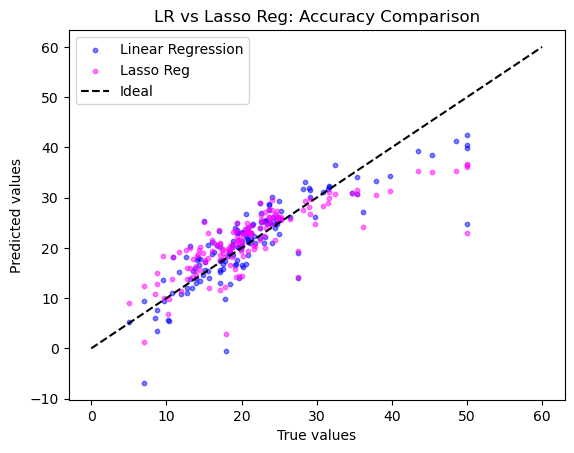

In [103]:
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.5, s=10, color='b')
plt.scatter(y_test, y_pred_las, label='Lasso Reg', alpha=0.5, s=10, color='magenta')
plt.plot([0, 60], [0, 60], 'k--', label='Ideal')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('LR vs Lasso Reg: Accuracy Comparison')
plt.legend()
plt.show()

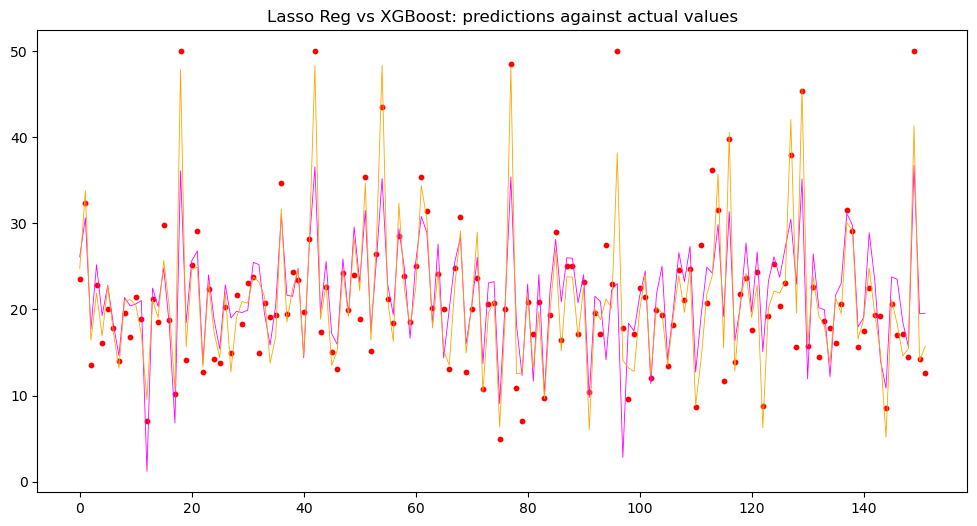

In [104]:
#Comparison between Lasso and XGBoost

temp = np.arange(0, len(y_test))
plt.figure(figsize=(12,6))
plt.scatter(temp, y_test, color = 'red', s=10)
plt.plot(temp, y_pred_las, color = 'magenta', label='Lasso',linewidth=0.6)
plt.plot(temp, y_pred_xgb, color = 'orange', label='XGB',linewidth=0.6)
plt.title ('Lasso Reg vs XGBoost: predictions against actual values')
plt.show()

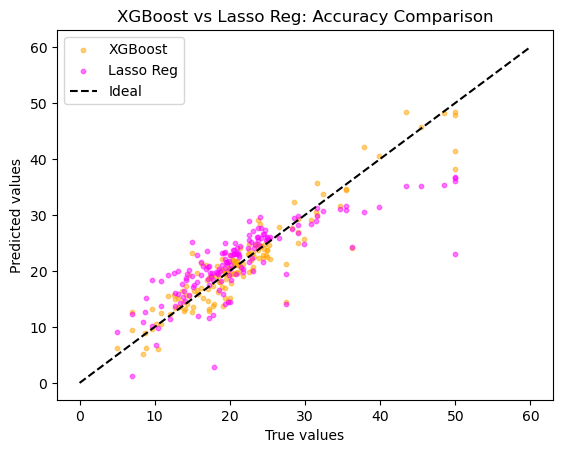

In [105]:
plt.scatter(y_test, y_pred_xgb, label='XGBoost', alpha=0.5, s=10, color='orange')
plt.scatter(y_test, y_pred_las, label='Lasso Reg', alpha=0.5, s=10, color='magenta')
plt.plot([0, 60], [0, 60], 'k--', label='Ideal')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('XGBoost vs Lasso Reg: Accuracy Comparison')
plt.legend()
plt.show()

In [106]:
#4f) Support Vector Machine (SVM) Regressor

from sklearn import svm

svm_reg = svm.SVR()
svm_reg.fit(X_train_std,y_train)

SVR()

SVM Regression model: Evaluation on Train data

In [107]:
y_pred_svm_tr = svm_reg.predict(X_train_std)

print("MSE",round(mean_squared_error(y_train,y_pred_svm_tr), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_train,y_pred_svm_tr)), 3))
print("MAE",round(mean_absolute_error(y_train,y_pred_svm_tr), 3))
print("MAPE",round(mean_absolute_percentage_error(y_train,y_pred_svm_tr), 3))
print("R2 Score : ", round(r2_score(y_train,y_pred_svm_tr), 3))

MSE 29.986
RMSE 5.476
MAE 3.12
MAPE 0.142
R2 Score :  0.659


Variability decently small, but R2 for the SVM Reg model on train data is ok but not great either

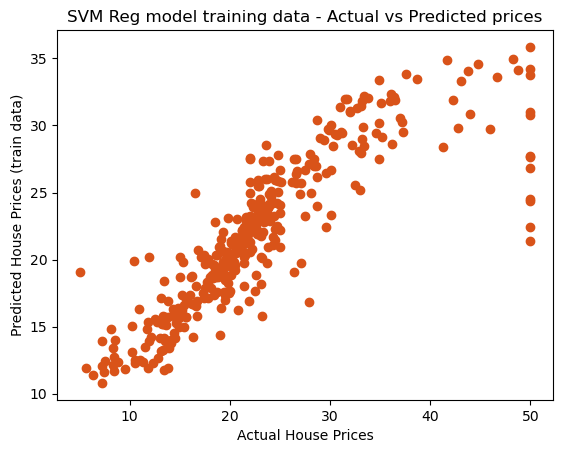

In [108]:
plt.scatter(y_train, y_pred_svm_tr, color='#D95319')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices (train data)")
plt.title("SVM Reg model training data - Actual vs Predicted prices")
plt.show()

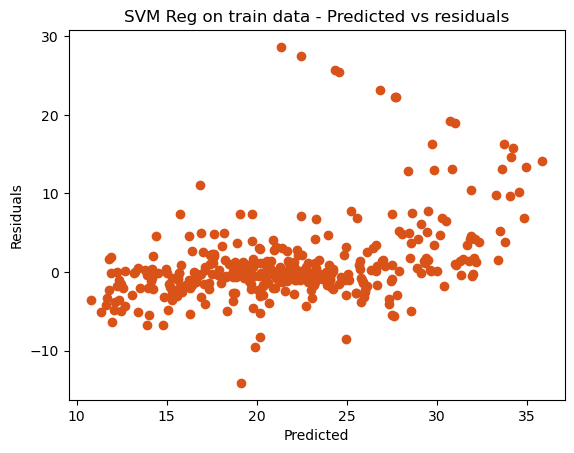

In [109]:
plt.scatter(y_pred_svm_tr,y_train-y_pred_svm_tr, color='#D95319')
plt.title("SVM Reg on train data - Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

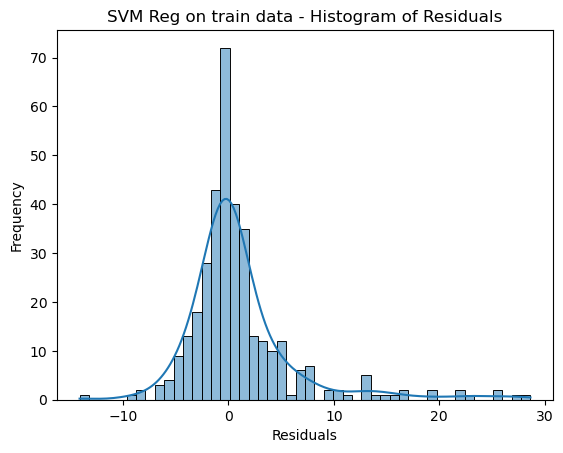

In [110]:
sns.histplot(y_train - y_pred_svm_tr, kde=True)
plt.title("SVM Reg on train data - Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

SVM Regression model on train data: has residuals nesting mostly at 0, and distribute normally as well.


SVM Regression model: Evaluation on Test data (predictions)

In [111]:
y_pred_svm = svm_reg.predict(X_test_std)

print("MSE",round(mean_squared_error(y_test,y_pred_svm), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred_svm)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred_svm), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred_svm), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred_svm), 3))

MSE 25.957
RMSE 5.095
MAE 2.921
MAPE 0.152
R2 Score :  0.652


On test data, the SVM Regression model is slightly more accurate than on train data. Again, good but definitely not great

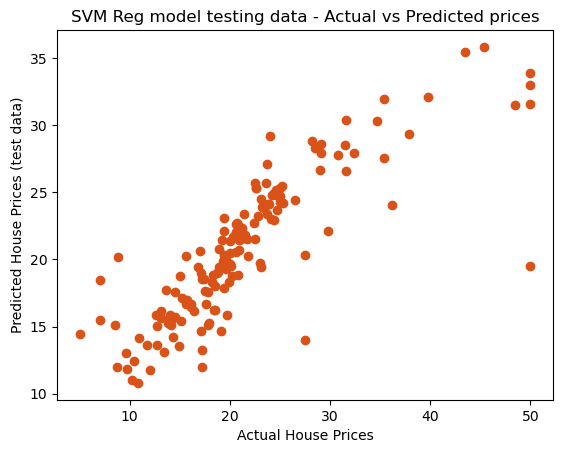

In [112]:
plt.scatter(y_test, y_pred_svm, color='#D95319')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices (test data)")
plt.title("SVM Reg model testing data - Actual vs Predicted prices")
plt.show()

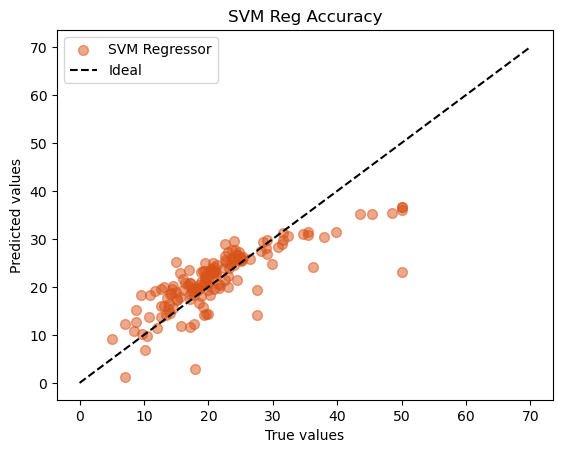

In [113]:
#Another visualization

plt.scatter(y_test, y_pred_las, label='SVM Regressor', alpha=0.5, s=50, color='#D95319')
plt.plot([0, 70], [0, 70], 'k--', label='Ideal')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('SVM Reg Accuracy')
plt.legend()
plt.show()

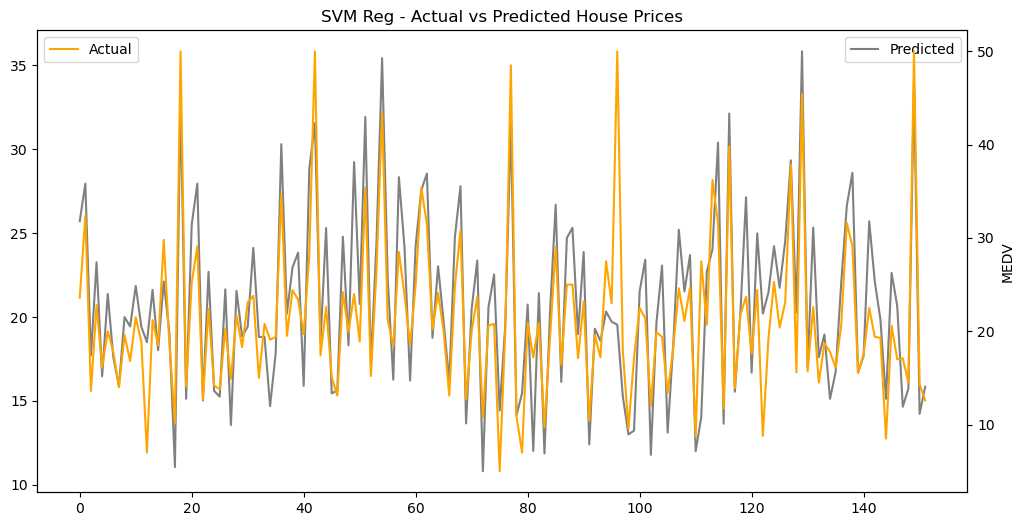

In [114]:
data_points = list(range(len(y_test)))

fig = plt.figure(figsize=(12, 6))
plt.title('SVM Reg - Actual vs Predicted House Prices')

fig = sns.lineplot(x=data_points, 
                   y=y_pred_svm, 
                   color="grey", 
                   legend='brief', 
                   label = "Predicted")
ax2 = plt.twinx()
fig = sns.lineplot(x=data_points, 
                   y=y_test, 
                   color="orange", 
                   legend='brief', 
                   label = "Actual",
                   ax=ax2)
plt.show()

The SVM Regressor model captures the 'trend' of test data with its predictions, even though most seem a bit overestimated. It's worth noting that it is underestimating high, peak values from y_test

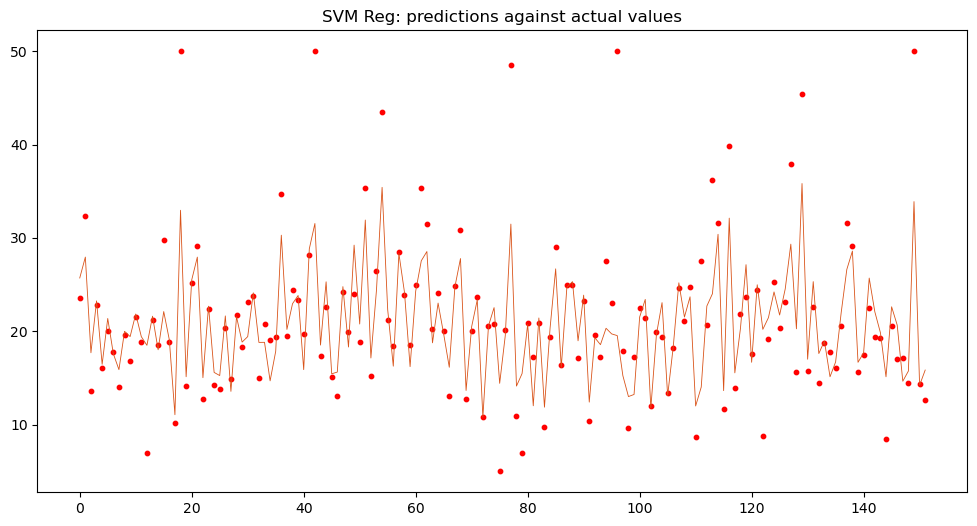

In [115]:
temp = np.arange(0, len(y_test))
plt.figure(figsize=(12,6))
plt.scatter(temp, y_test, color = 'red', s=10)
plt.plot(temp, y_pred_svm, color = '#D95319', linewidth=0.6)
plt.title ('SVM Reg: predictions against actual values')
plt.show()

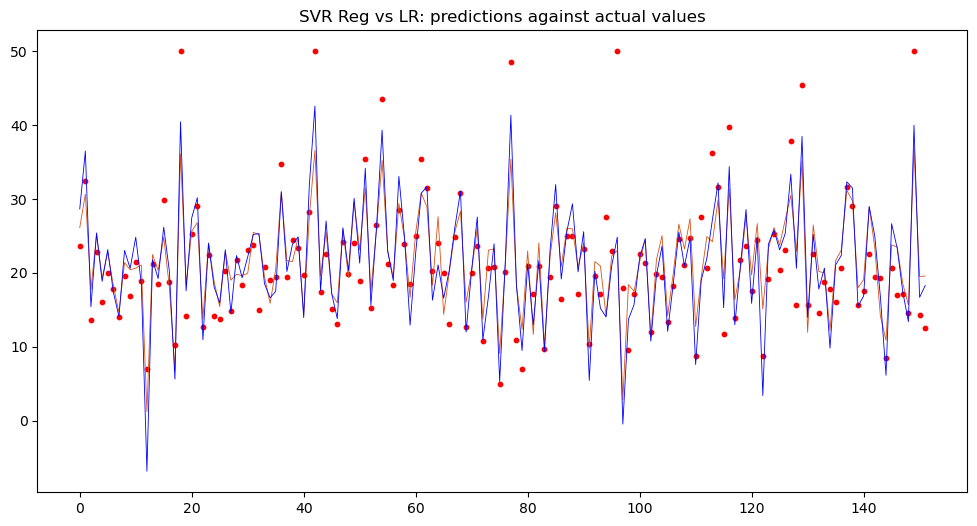

In [116]:
#Comparison between SVR Regressor and LR models

temp = np.arange(0, len(y_test))
plt.figure(figsize=(12,6))
plt.scatter(temp, y_test, color = 'red', s=10)
plt.plot(temp, y_pred_las, color = '#D95319', label='SVR',linewidth=0.6)
plt.plot(temp, y_pred_lr, color = 'b', label='LR',linewidth=0.6)
plt.title ('SVR Reg vs LR: predictions against actual values')
plt.show()

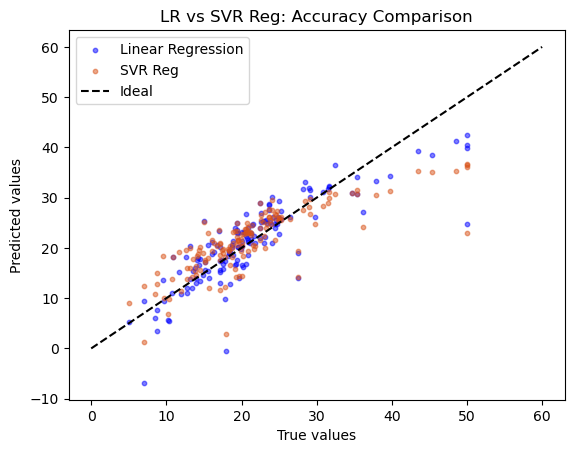

In [117]:
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.5, s=10, color='b')
plt.scatter(y_test, y_pred_las, label='SVR Reg', alpha=0.5, s=10, color='#D95319')
plt.plot([0, 60], [0, 60], 'k--', label='Ideal')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('LR vs SVR Reg: Accuracy Comparison')
plt.legend()
plt.show()

LR and SVR Regressor seem quite similar in predicting values from the test set

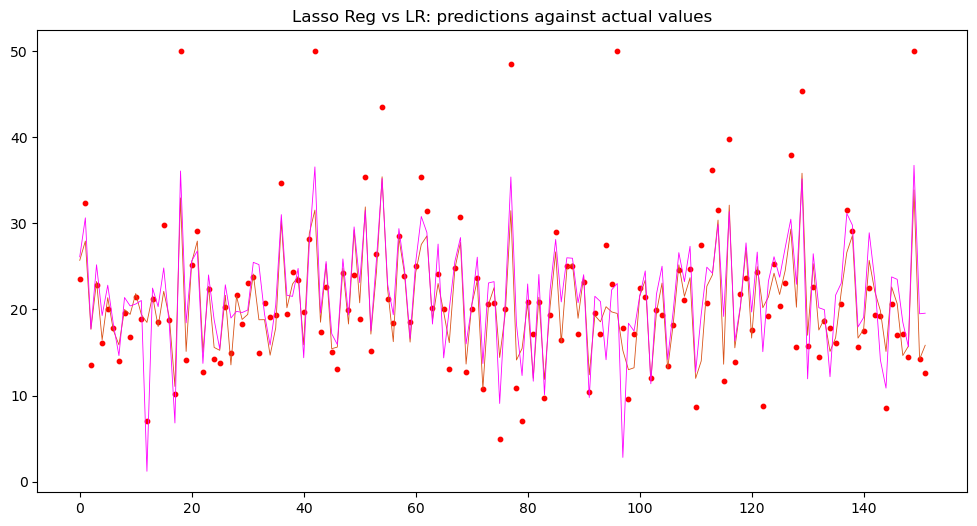

In [118]:
#Comparison between SVM Reg and Lasso models

temp = np.arange(0, len(y_test))
plt.figure(figsize=(12,6))
plt.scatter(temp, y_test, color = 'red', s=10)
plt.plot(temp, y_pred_svm, color = '#D95319', label='SVM Reg',linewidth=0.6)
plt.plot(temp, y_pred_las, color = 'magenta', label='Lasso',linewidth=0.6)
plt.title ('Lasso Reg vs LR: predictions against actual values')
plt.show()

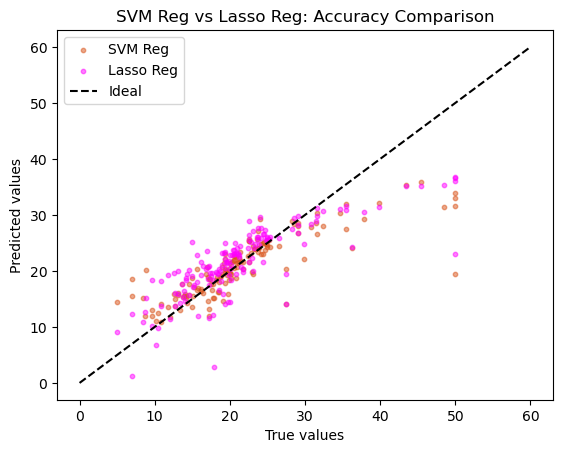

In [119]:
plt.scatter(y_test, y_pred_svm, label='SVM Reg', alpha=0.5, s=10, color='#D95319')
plt.scatter(y_test, y_pred_las, label='Lasso Reg', alpha=0.5, s=10, color='magenta')
plt.plot([0, 60], [0, 60], 'k--', label='Ideal')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('SVM Reg vs Lasso Reg: Accuracy Comparison')
plt.legend()
plt.show()

SVM Regressor and Lasso regressor also behave similarly (maybe a slight edge for SVM Reg)

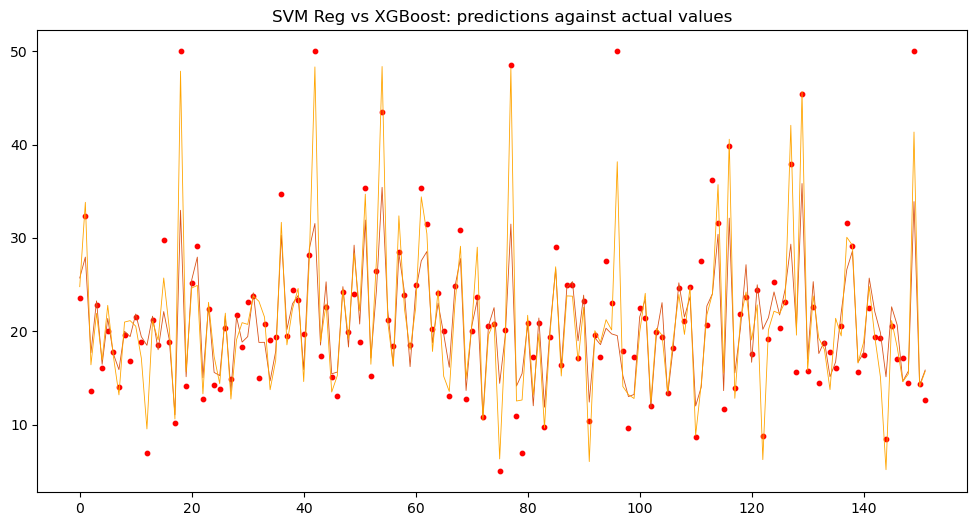

In [120]:
#Comparison between SVM Reg and XGBoost

temp = np.arange(0, len(y_test))
plt.figure(figsize=(12,6))
plt.scatter(temp, y_test, color = 'red', s=10)
plt.plot(temp, y_pred_svm, color = '#D95319', label='SVM Reg',linewidth=0.6)
plt.plot(temp, y_pred_xgb, color = 'orange', label='XGB',linewidth=0.6)
plt.title ('SVM Reg vs XGBoost: predictions against actual values')
plt.show()

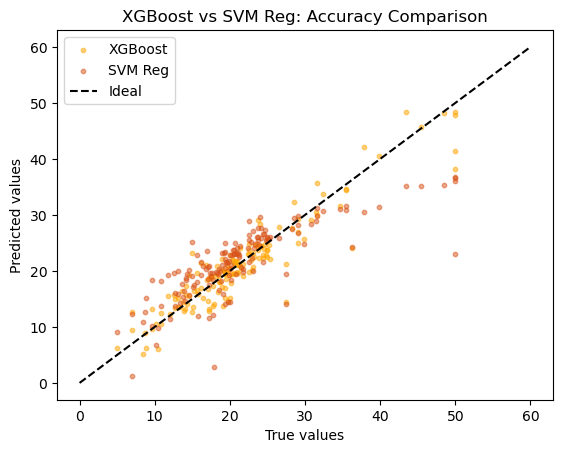

In [121]:
plt.scatter(y_test, y_pred_xgb, label='XGBoost', alpha=0.5, s=10, color='orange')
plt.scatter(y_test, y_pred_las, label='SVM Reg', alpha=0.5, s=10, color='#D95319')
plt.plot([0, 60], [0, 60], 'k--', label='Ideal')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('XGBoost vs SVM Reg: Accuracy Comparison')
plt.legend()
plt.show()

The SVM model is no match to the XGBoost model, which is the best we have used so far.